# 🏦 Machine Learning for Credit Risk Modelling (Fraud Detection)

## 📌 Project Overview  
Credit risk modelling is a crucial part of financial institutions to **predict whether a loan applicant will default or commit fraud**.  
The main objective of this project is to build robust models that assess **payment history, previous applications, and loan data**  
to classify customers into **high-risk or low-risk** groups.  

By doing so, banks and fintech companies can **minimize losses, prevent fraud, and make better lending decisions**.  

---

## 📂 Datasets Used  
- **`payment_history.csv`** → customer repayment behaviors  
- **`previous_applications.csv`** → history of prior loans and applications  
- **`train.csv` & `test.csv`** → main dataset for supervised training and evaluation  

---

## 🛠️ Workflow  

### 1. Data Preparation  
- Merge multiple sources (payment history, previous applications, train/test)  
- Handle **categorical & numerical features** separately  
- Deal with **missing values, outliers, and data imbalance** (SMOTE for fraud cases)  

### 2. Feature Engineering  
- Payment patterns (on-time vs delayed payments)  
- Loan-to-income ratio  
- Number of past defaults  
- Application channel & organization type  

### 3. Machine Learning Models  
We experimented with multiple models:  
- 🌳 **Decision Tree**  
- 🌲 **Random Forest**  
- 🚀 **Gradient Boost**  
- 🔥 **XGBoost (best performer)**  
- 🐱 **CatBoost**  
- ⚡ **AdaBoost**  
- 📊 **Feature Importance** → interpret drivers of risk  

### 4. Evaluation Metrics  
- **AUC-ROC** → ability to distinguish fraud vs non-fraud  
- **F1-Score** → balance precision & recall  
- **Confusion Matrix** → check false positives/negatives  

---

## 🏆 Key Results  
- **XGBoost achieved the highest performance**, making it the most reliable model for detecting fraudulent/ risky applicants  
- Important predictors: **payment history, previous default records, loan amount, income level, and organization type**  

---

## 📌 Conclusion  
This project demonstrates how **machine learning can detect fraud in credit applications** effectively.  
By combining multiple data sources and using advanced boosting methods like **XGBoost**,  
financial institutions can significantly **reduce fraud risk and improve credit decision-making**.  


# Preparation

In [ ]:
!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow
!pip install catboost
!pip install tensorflow
!pip install optuna

  Cloning https://github.com/scikit-multiflow/scikit-multiflow to /tmp/pip-req-build-my33rhud
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-multiflow/scikit-multiflow /tmp/pip-req-build-my33rhud
  Resolved https://github.com/scikit-multiflow/scikit-multiflow to commit d073a706b5006cba2584761286b7fa17e74e87be
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.6.dev0-cp310-cp310-linux_x86_64.whl size=1328689 sha256=99e6cd9d1c7a99c4b0f5701b587838da48a3f9d156c897e04e0728b9eb2f1e4b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4vq75f0s/wheels/6c/3b/bb/448d28745a0e3209c9347e3af9fdebfc8ff493e3bf0cebd6e0
Successfully built scikit-multiflow
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:

# These packages are for Data manipulation.
import pandas as pd
import numpy as np
import sklearn
# These packages are useful data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# Useful for Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import ConceptDriftStream
from skmultiflow.evaluation import EvaluatePrequential
# These packages are useful for model evaluation
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import roc_curve

In [ ]:
!pip install catboost
!pip install tensorflow
!pip install optuna

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/STC 2024/payment_history.csv")
df2 = pd.read_csv("/content/drive/MyDrive/STC 2024/previous_applications.csv")
df3 = pd.read_csv("/content/drive/MyDrive/STC 2024/train.csv")
df4 = pd.read_csv("/content/drive/MyDrive/STC 2024/test.csv")

# Model for Flag

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Payment History

In [ ]:
df1

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,1137312,164489,12,-1384.000,-1417.000,5970.375,5970.375
1,2723183,112102,14,-197.000,-197.000,70.740,70.740
2,2558880,154793,8,-1262.000,-1269.000,15031.080,15031.080
3,1410565,197687,1,-1037.000,-1048.000,12514.050,12510.450
4,2391610,183431,20,-1680.000,-1693.000,7875.000,7875.000
...,...,...,...,...,...,...,...
2872301,1024845,407119,5,-224.000,-230.000,24819.660,24819.660
2872302,2597827,448211,18,-44.000,-44.000,915.795,915.795
2872303,2003162,450999,16,-2135.000,-2113.000,5414.265,5384.880
2872304,2149043,415032,9,-425.000,-434.000,46517.490,46517.490


In [ ]:
df1.describe()

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
count,2872306.000,2872306.000,2872306.000,2872306.000,2871633.000,2872306.000,2871633.000
mean,1902798.084,278520.790,18.659,-1039.830,-1048.684,16928.808,17087.922
std,535873.470,102681.409,26.356,799.541,799.113,50104.681,54221.717
min,1000020.000,100009.000,1.000,-2922.000,-3129.000,0.000,0.000
25%,1435627.000,189310.000,4.000,-1651.000,-1659.000,4199.850,3389.490
50%,1894453.000,278689.000,8.000,-817.000,-826.000,8787.330,8095.050
75%,2368624.000,367577.000,19.000,-358.000,-367.000,16617.094,15973.200
max,2843498.000,456255.000,225.000,-2.000,-2.000,3371884.155,3371884.155


In [ ]:
len(df1['SK_ID_PREV'].unique())

211734

In [ ]:
len(df1['U_ID'].unique())

72301

In [ ]:
df1.isnull().sum()

SK_ID_PREV       0
U_ID             0
INST_NUMBER      0
INST_DAYS        0
PAY_DAYS       673
AMT_INST         0
AMT_PAY        673
dtype: int64

In [ ]:
df1[df1.PAY_DAYS.isnull()==True]

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
645595,1265332,167942,5,-14.000,NaN,11650.500,NaN
645596,2776343,151961,31,-2.000,NaN,15097.275,NaN
645597,2312379,107766,46,-1464.000,NaN,67.500,NaN
645598,1319969,133112,22,-58.000,NaN,33089.310,NaN
645599,1153254,120931,26,-1440.000,NaN,67.500,NaN
...,...,...,...,...,...,...,...
2872080,1666631,429716,38,-1797.000,NaN,67.500,NaN
2872081,1280188,435393,35,-1678.000,NaN,67.500,NaN
2872192,2682640,418699,1,-24.000,NaN,42419.205,NaN
2872193,1766391,413446,45,-1668.000,NaN,67.500,NaN


In [ ]:
df1_sort = df1.sort_values(by="U_ID")

In [ ]:
df1_sort = df1_sort.reset_index(drop=True)

In [ ]:
df1_sort

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,1413109,100009,3,-358.000,-367.000,8996.760,8996.760
1,2227125,100009,6,-124.000,-134.000,8819.955,8819.955
2,1193310,100009,3,-1420.000,-1425.000,17341.605,17341.605
3,2007057,100009,4,-187.000,-194.000,7500.735,7500.735
4,2007057,100009,6,-127.000,-134.000,7499.565,7499.565
...,...,...,...,...,...,...,...
2872301,1179690,456255,6,-512.000,-523.000,28873.170,28873.170
2872302,2631384,456255,3,-696.000,-705.000,27489.690,27489.690
2872303,2631384,456255,19,-216.000,-237.000,27489.690,27489.690
2872304,2631384,456255,6,-606.000,-613.000,27489.690,27489.690


In [ ]:
df1_sort[df1_sort.INST_DAYS<=df1_sort.PAY_DAYS]

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
17,1359598,100009,4,-2848.000,-2841.000,6155.280,6155.280
65,1496284,100039,2,-2337.000,-2337.000,4450.680,4450.680
72,2088496,100044,22,-1699.000,-1696.000,22962.330,22911.030
73,2063227,100044,15,-1072.000,-1072.000,29545.200,29545.200
83,2088496,100044,23,-1669.000,-1669.000,22962.330,22962.330
...,...,...,...,...,...,...,...
2872284,1743609,456255,8,-750.000,-745.000,11090.835,11090.835
2872285,2631384,456255,14,-366.000,-366.000,27489.690,27489.690
2872286,1359084,456255,6,-275.000,-268.000,11314.170,2065.950
2872287,1359084,456255,7,-245.000,-243.000,11314.170,11314.170


In [ ]:
df1_sort[df1_sort.AMT_INST>df1_sort.AMT_PAY]

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
72,2088496,100044,22,-1699.000,-1696.000,22962.330,22911.030
92,2088496,100044,18,-1819.000,-1817.000,22962.330,22951.710
97,1137041,100044,18,-2060.000,-2058.000,11882.970,5868.900
108,2088496,100044,18,-1819.000,-1850.000,22962.330,10.620
122,1137041,100044,18,-2060.000,-2039.000,11882.970,6014.070
...,...,...,...,...,...,...,...
2872275,2631384,456255,20,-186.000,-182.000,27489.690,27042.435
2872276,2631384,456255,17,-276.000,-301.000,27489.690,737.910
2872286,1359084,456255,6,-275.000,-268.000,11314.170,2065.950
2872297,2631384,456255,18,-246.000,-266.000,27489.690,110.880


In [ ]:
df1_sort['U_ID'].unique()

array([100009, 100039, 100044, ..., 456249, 456252, 456255])

In [ ]:
def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        mid_value = arr[mid]

        if mid_value == target:
            return mid  # Element found, return its index
        elif mid_value < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1  # Element not found

In [ ]:
ONTIME = []
FULL = []
for i in df1_sort.index.tolist():
  ontime = 0
  full = 0
  if df1_sort['INST_DAYS'][i]>df1_sort['PAY_DAYS'][i]:
    ontime = 1
  if df1_sort['AMT_INST'][i]<=df1_sort['AMT_PAY'][i]:
    full = 1
  ONTIME.append(ontime)
  FULL.append(full)

In [ ]:
len(ONTIME)

2872306

In [ ]:
len(FULL)

2872306

In [ ]:
df1_sort['ONTIME'] = ONTIME
df1_sort['FULL'] = FULL

In [ ]:
df1_sort

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,ONTIME,FULL
0,1413109,100009,3,-358.000,-367.000,8996.760,8996.760,1,1
1,2227125,100009,6,-124.000,-134.000,8819.955,8819.955,1,1
2,1193310,100009,3,-1420.000,-1425.000,17341.605,17341.605,1,1
3,2007057,100009,4,-187.000,-194.000,7500.735,7500.735,1,1
4,2007057,100009,6,-127.000,-134.000,7499.565,7499.565,1,1
...,...,...,...,...,...,...,...,...,...
2872301,1179690,456255,6,-512.000,-523.000,28873.170,28873.170,1,1
2872302,2631384,456255,3,-696.000,-705.000,27489.690,27489.690,1,1
2872303,2631384,456255,19,-216.000,-237.000,27489.690,27489.690,1,1
2872304,2631384,456255,6,-606.000,-613.000,27489.690,27489.690,1,1


In [ ]:
df1_sort['FULL'].value_counts()

1    2595445
0     276861
Name: FULL, dtype: int64

In [ ]:
df1_sort['ONTIME'].value_counts()

1    1966259
0     906047
Name: ONTIME, dtype: int64

In [ ]:
df1_sort1 = df1_sort.drop(columns = ['SK_ID_PREV','INST_NUMBER','INST_DAYS','PAY_DAYS','AMT_INST','AMT_PAY'])

In [ ]:
df1_sort1

,U_ID,ONTIME,FULL
0,100009,1,1
1,100009,1,1
2,100009,1,1
3,100009,1,1
4,100009,1,1
...,...,...,...
2872301,456255,1,1
2872302,456255,1,1
2872303,456255,1,1
2872304,456255,1,1


In [ ]:
len(df1_sort1['U_ID'].unique())

72301

In [ ]:
len(df1_sort1[df1_sort1.U_ID==100009])

51

In [ ]:
len(df1_sort1[(df1_sort1.U_ID==100009) & (df1_sort1.ONTIME==1)])

50

In [ ]:
len(df1_sort1[(df1_sort1.U_ID==100009) & (df1_sort1.FULL==1)])

51

In [ ]:
df1_sort1_cop = df1_sort1

In [ ]:
df1_fin = []
for i in df1_sort1['U_ID'].unique().tolist():
  new_row = []
  total = len(df1_sort1[df1_sort1.U_ID==i])
  total_ontime = len(df1_sort1[(df1_sort1.U_ID==i) & (df1_sort1.ONTIME==1)])
  total_full = len(df1_sort1[(df1_sort1.U_ID==i) & (df1_sort1.FULL==1)])
  perc_ontime = total_ontime/total
  perc_full = total_full/total
  new_row.append(i)
  new_row.append(perc_ontime)
  new_row.append(perc_full)

  df1_fin.append(new_row)

In [ ]:
df1_fin

[[100009, 0.9803921568627451, 1.0],
 [100039, 0.9523809523809523, 1.0],
 [100044, 0.8450704225352113, 0.9154929577464789],
 [100045, 0.640625, 0.90625],
 [100046, 0.35294117647058826, 1.0],
 [100047, 0.75, 1.0],
 [100051, 0.7777777777777778, 1.0],
 [100054, 0.9361702127659575, 0.9148936170212766],
 [100056, 0.5591397849462365, 0.5483870967741935],
 [100077, 0.6666666666666666, 0.5],
 [100081, 0.9, 1.0],
 [100085, 1.0, 1.0],
 [100093, 0.9661016949152542, 0.9661016949152542],
 [100100, 0.4915254237288136, 0.9774011299435028],
 [100103, 0.6666666666666666, 0.3333333333333333],
 [100114, 0.5, 0.4],
 [100122, 0.7692307692307693, 0.8461538461538461],
 [100123, 0.9661016949152542, 1.0],
 [100125, 0.7027027027027027, 0.8378378378378378],
 [100126, 1.0, 1.0],
 [100131, 0.5161290322580645, 1.0],
 [100132, 1.0, 1.0],
 [100135, 1.0, 1.0],
 [100136, 0.8787878787878788, 0.8787878787878788],
 [100149, 0.8571428571428571, 0.7142857142857143],
 [100153, 0.5219512195121951, 0.8926829268292683],
 [100163

In [ ]:
df1_fin2 = pd.DataFrame(df1_fin, columns = ['U_ID','PERC_ONTIME','PERC_FULL'])

In [ ]:
df1_fin2

,U_ID,PERC_ONTIME,PERC_FULL
0,100009,0.980,1.000
1,100039,0.952,1.000
2,100044,0.845,0.915
3,100045,0.641,0.906
4,100046,0.353,1.000
...,...,...,...
72296,456247,0.328,1.000
72297,456248,0.891,0.826
72298,456249,0.833,1.000
72299,456252,0.667,1.000


## Previous Appications

In [ ]:
df2.describe()

,SK_ID_PREV,U_ID,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,350712.000,350712.000,274103.000,350712.000,350712.000,164205.000,271072.000,350712.000,350712.000,274103.000,211407.000,211407.000,211407.000,211407.000
mean,1923527.736,278626.100,15793.210,174720.532,195856.429,6667.307,226075.885,12.474,-877.825,16.074,342238.632,13228.356,82378.742,0.332
std,532217.060,102733.229,14601.034,292448.364,318517.561,20243.176,314732.401,3.327,781.578,14.595,88866.481,71030.663,153553.036,0.471
min,1000020.000,100009.000,0.000,0.000,0.000,-0.450,0.000,0.000,-2922.000,0.000,-2922.000,-2892.000,-2845.000,0.000
25%,1463183.250,189728.000,6258.915,19575.000,24736.500,0.000,49660.909,10.000,-1307.000,6.000,365243.000,-1625.000,-1267.000,0.000
50%,1923225.500,279204.000,11201.085,70290.000,80092.845,1768.500,110115.000,12.000,-581.000,12.000,365243.000,-825.000,-495.000,0.000
75%,2384275.500,367667.250,20356.065,180000.000,215640.000,7677.000,229500.000,15.000,-271.000,24.000,365243.000,-408.000,-43.000,1.000
max,2845381.000,456255.000,418058.145,4050000.000,4104351.000,2150100.000,4050000.000,23.000,-2.000,84.000,365243.000,365243.000,365243.000,1.000


In [ ]:
len(df2['U_ID'].unique())

72135

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2['CONTRACT_STATUS'].value_counts()

Approved        219687
Canceled         64590
Refused          60795
Unused offer      5640
Name: CONTRACT_STATUS, dtype: int64

In [ ]:
df2['CONTRACT_STATUS'].isnull().sum()

0

In [ ]:
df2[df2.AMT_DOWN_PAYMENT<0]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
257150,1817983,133068,Consumer loans,3595.545,32719.050,32719.500,-0.450,32719.050,SUNDAY,13,Approved,-478,10.000,low_normal,365243.000,-430.000,-415.000,0.000


In [ ]:
df2[df2.CONTRACT_STATUS=='Approved']

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Approved,-73,12.000,middle,365243.000,-42.000,-37.000,0.000
1,2819243,176158,Cash loans,47041.335,450000.000,470790.000,NaN,450000.000,MONDAY,7,Approved,-512,12.000,middle,365243.000,-482.000,-177.000,1.000
2,1383531,199383,Cash loans,23703.930,315000.000,340573.500,NaN,315000.000,SATURDAY,8,Approved,-684,18.000,low_normal,365243.000,-654.000,-137.000,1.000
4,1715995,447712,Cash loans,11368.620,270000.000,335754.000,NaN,270000.000,FRIDAY,7,Approved,-735,54.000,low_normal,365243.000,-705.000,-334.000,1.000
5,1151694,161591,Consumer loans,39111.075,214380.000,209497.500,13500.000,214380.000,FRIDAY,12,Approved,-989,6.000,middle,365243.000,-958.000,-804.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350691,2526478,451763,Cash loans,31170.645,720000.000,806485.500,NaN,720000.000,TUESDAY,10,Approved,-1071,42.000,low_normal,365243.000,-1041.000,-527.000,1.000
350692,1492303,348082,Cash loans,101793.555,990000.000,1018750.500,NaN,990000.000,WEDNESDAY,4,Approved,-568,12.000,middle,365243.000,-538.000,-200.000,1.000
350695,1229904,280109,Consumer loans,14490.360,140754.240,153013.500,3.240,140754.240,TUESDAY,14,Approved,-1301,12.000,low_normal,365243.000,-1270.000,-967.000,0.000
350697,1883185,418537,Cash loans,10751.985,90000.000,95940.000,0.000,90000.000,FRIDAY,10,Approved,-2199,12.000,high,365243.000,-2169.000,-1833.000,1.000


In [ ]:
df2[(df2.CONTRACT_STATUS=='Approved') & (df2.LOAN_ANNUITY.isnull())]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
48593,1899883,306602,Cash loans,NaN,202500.000,202500.000,NaN,202500.000,MONDAY,10,Approved,-505,NaN,NA1,NaN,NaN,NaN,NaN
227715,2317108,448308,Cash loans,NaN,675000.000,675000.000,NaN,675000.000,WEDNESDAY,12,Approved,-343,NaN,NA1,NaN,NaN,NaN,NaN


In [ ]:
df2_app = df2[df2.CONTRACT_STATUS=='Approved']
df2_ref = df2[df2.CONTRACT_STATUS=='Refused']

In [ ]:
print(len(df2_app[(df2_app.LOAN_ANNUITY==0) & (df2_app.PRODUCT_PRICE.isnull()==True)]))
print(len(df2_app[(df2_app.LOAN_ANNUITY==0) & (df2_app.PRODUCT_PRICE==0)]))
print(len(df2_app[df2_app.LOAN_ANNUITY==0]))

48
234
282


In [ ]:
df2_app = df2_app.drop(df2_app[df2_app.PRODUCT_PRICE==0].index)
df2_app = df2_app.drop(df2_app[df2_app.PRODUCT_PRICE.isna()==True].index)

In [ ]:
df2_app.isnull().sum()

SK_ID_PREV                       0
U_ID                             0
CONTRACT_TYPE                    0
LOAN_ANNUITY                     2
APPLICATION                      0
APPROVED_CREDIT                  0
AMT_DOWN_PAYMENT             69135
PRODUCT_PRICE                    0
APPLY_DAYS                       0
APPLY_HOUR                       0
CONTRACT_STATUS                  0
DAYS_DECISION                    0
TERM_PAYMENT                     2
YIELD_GROUP                      0
FIRST_DRAW                    8082
FIRST_DUE                     8082
TERMINATION                   8082
NFLAG_INSURED_ON_APPROVAL     8082
dtype: int64

In [ ]:
df2_app.loc[df2_app['AMT_DOWN_PAYMENT'].isnull(), 'AMT_DOWN_PAYMENT'] = 0

In [ ]:
df2_app[df2_app.LOAN_ANNUITY.isna()==True]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
48593,1899883,306602,Cash loans,NaN,202500.000,202500.000,0.000,202500.000,MONDAY,10,Approved,-505,NaN,NA1,NaN,NaN,NaN,NaN
227715,2317108,448308,Cash loans,NaN,675000.000,675000.000,0.000,675000.000,WEDNESDAY,12,Approved,-343,NaN,NA1,NaN,NaN,NaN,NaN


In [ ]:
df2_app[df2_app.TERM_PAYMENT.isna()==True]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
48593,1899883,306602,Cash loans,NaN,202500.000,202500.000,0.000,202500.000,MONDAY,10,Approved,-505,NaN,NA1,NaN,NaN,NaN,NaN
227715,2317108,448308,Cash loans,NaN,675000.000,675000.000,0.000,675000.000,WEDNESDAY,12,Approved,-343,NaN,NA1,NaN,NaN,NaN,NaN


In [ ]:
df2_app = df2_app.drop(df2_app[df2_app.LOAN_ANNUITY.isna()==True].index)
df2_app = df2_app.drop(df2_app[df2_app.AMT_DOWN_PAYMENT<0].index)
df2_app = df2_app.drop(df2_app[df2_app['TERM_PAYMENT']==0].index)

In [ ]:
df2_app[df2_app.FIRST_DUE==365243]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
465,2240368,455588,Consumer loans,21374.235,101065.500,103315.500,0.000,101065.500,SUNDAY,12,Approved,-20,6.000,high,365243.000,365243.000,365243.000,0.000
775,1112503,184568,Consumer loans,36897.525,383625.000,387225.000,13500.000,383625.000,SATURDAY,8,Approved,-26,12.000,low_normal,365243.000,365243.000,365243.000,1.000
1022,1614106,316574,Consumer loans,10305.945,99301.500,99301.500,0.000,99301.500,SATURDAY,15,Approved,-20,12.000,middle,365243.000,365243.000,365243.000,0.000
1048,1549372,291013,Consumer loans,9126.090,59427.000,65704.500,0.000,59427.000,TUESDAY,11,Approved,-15,8.000,low_normal,365243.000,365243.000,365243.000,0.000
1108,1701668,254838,Consumer loans,9234.180,115312.500,148801.500,0.000,115312.500,MONDAY,8,Approved,-17,24.000,middle,365243.000,365243.000,365243.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350456,1535298,207857,Consumer loans,4356.900,41926.500,46908.000,0.000,41926.500,SATURDAY,12,Approved,-19,12.000,low_action,365243.000,365243.000,365243.000,1.000
350515,1455792,177098,Consumer loans,5146.155,83511.000,83511.000,0.000,83511.000,THURSDAY,13,Approved,-25,18.000,low_action,365243.000,365243.000,365243.000,0.000
350605,1164145,242652,Consumer loans,3221.775,28365.795,28365.795,0.000,28365.795,SUNDAY,11,Approved,-10,10.000,low_normal,365243.000,365243.000,365243.000,0.000
350626,1567505,267574,Cash loans,46859.580,450000.000,473760.000,0.000,450000.000,TUESDAY,8,Approved,-11,12.000,middle,365243.000,365243.000,365243.000,1.000


In [ ]:
df2_app[df2_app.TERMINATION==365243]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
11,1241792,404105,Consumer loans,23343.030,132480.000,125527.500,13248.000,132480.000,SATURDAY,16,Approved,-33,6.000,middle,365243.000,-3.000,365243.000,1.000
68,2357836,342771,Consumer loans,3836.970,25272.000,27774.000,0.000,25272.000,THURSDAY,11,Approved,-111,10.000,high,365243.000,-81.000,365243.000,1.000
76,1180171,225043,Cash loans,39467.250,675000.000,675000.000,0.000,675000.000,SUNDAY,13,Approved,-703,24.000,middle,365243.000,-673.000,365243.000,0.000
82,1146972,223260,Consumer loans,16915.860,205191.000,231597.000,0.000,205191.000,WEDNESDAY,11,Approved,-482,18.000,middle,365243.000,-451.000,365243.000,0.000
102,2029467,272288,Cash loans,41047.920,1174500.000,1327981.500,0.000,1174500.000,WEDNESDAY,14,Approved,-449,54.000,low_normal,365243.000,-419.000,365243.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350651,1376778,420711,Consumer loans,13354.020,66262.500,71509.500,0.000,66262.500,WEDNESDAY,12,Approved,-14,6.000,middle,365243.000,365243.000,365243.000,0.000
350661,2076832,388795,Cash loans,11781.000,225000.000,225000.000,0.000,225000.000,THURSDAY,14,Approved,-175,24.000,low_normal,365243.000,-145.000,365243.000,0.000
350665,2688118,132024,Cash loans,29775.285,157500.000,162697.500,0.000,157500.000,SATURDAY,11,Approved,-138,6.000,middle,365243.000,-108.000,365243.000,1.000
350672,1636560,146987,Cash loans,32449.635,630000.000,716485.500,0.000,630000.000,WEDNESDAY,13,Approved,-333,48.000,middle,365243.000,-303.000,365243.000,1.000


In [ ]:
df2_app.drop(columns = ['FIRST_DRAW'], inplace = True)
df2_app = df2_app.drop(df2_app[df2_app.FIRST_DUE==365243].index)
df2_app = df2_app.drop(df2_app[df2_app.TERMINATION==365243].index)

In [ ]:
df2_app[(df2_app.FIRST_DUE.isna()==True) & (df2_app.TERMINATION.isna()==True) & (df2_app.NFLAG_INSURED_ON_APPROVAL.isna()==True)]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
64,2240087,434717,Consumer loans,4252.230,26811.000,26811.000,0.000,26811.000,SUNDAY,19,Approved,-2385,8.000,high,NaN,NaN,NaN
99,1590725,350737,Consumer loans,12512.160,88285.500,85059.000,8820.000,88285.500,TUESDAY,18,Approved,-1246,8.000,middle,NaN,NaN,NaN
114,1256552,343616,Consumer loans,9150.930,76455.000,74866.500,7645.500,76455.000,MONDAY,16,Approved,-365,10.000,middle,NaN,NaN,NaN
208,1439417,308714,Consumer loans,4753.260,29970.000,29970.000,0.000,29970.000,THURSDAY,15,Approved,-2687,8.000,high,NaN,NaN,NaN
209,2409887,344450,Cash loans,5040.000,45000.000,45000.000,0.000,45000.000,FRIDAY,9,Approved,-2202,12.000,high,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350597,1034481,129396,Cash loans,49718.520,841500.000,890374.500,0.000,841500.000,THURSDAY,15,Approved,-247,24.000,low_normal,NaN,NaN,NaN
350601,1711553,321983,Cash loans,10618.875,45000.000,52366.500,0.000,45000.000,MONDAY,17,Approved,-318,6.000,high,NaN,NaN,NaN
350606,1282180,154649,Cash loans,28502.820,225000.000,271300.500,0.000,225000.000,FRIDAY,12,Approved,-515,12.000,middle,NaN,NaN,NaN
350655,2665038,456061,Cash loans,17001.765,90000.000,92970.000,0.000,90000.000,TUESDAY,10,Approved,-1046,6.000,low_normal,NaN,NaN,NaN


In [ ]:
df2_app = df2_app.drop(df2_app[df2_app.FIRST_DUE.isna()==True].index)

In [ ]:
df2_app['YIELD_GROUP'].value_counts()

high          59136
middle        54154
low_normal    37382
low_action    10015
Name: YIELD_GROUP, dtype: int64

In [ ]:
df2_app.describe()

,SK_ID_PREV,U_ID,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,160687.000,160687.000,160687.000,160687.000,160687.000,160687.000,160687.000,160687.000,160687.000,160687.000,160687.000,160687.000,160687.000
mean,1902439.779,278404.537,13754.136,152006.094,159478.326,5308.168,152006.094,12.631,-1284.886,13.613,-1251.666,-988.097,0.336
std,535194.531,102649.531,13036.985,211609.540,228849.942,15828.599,211609.540,3.304,759.188,9.519,758.456,747.631,0.472
min,1000020.000,100009.000,646.515,6255.000,5823.000,0.000,6255.000,0.000,-2922.000,3.000,-2892.000,-2845.000,0.000
25%,1434623.500,189390.000,5737.208,44955.000,42585.750,0.000,44955.000,10.000,-1877.000,8.000,-1842.000,-1551.000,0.000
50%,1894960.000,278776.000,9769.140,86625.000,84573.000,0.000,86625.000,12.000,-1093.000,12.000,-1060.000,-795.000,0.000
75%,2368382.000,367287.000,16650.405,157500.000,164223.000,6106.500,157500.000,15.000,-651.000,12.000,-619.000,-347.000,1.000
max,2843498.000,456255.000,210115.485,4050000.000,4050000.000,2025000.000,4050000.000,23.000,-8.000,72.000,-4.000,-2.000,1.000


In [ ]:
df2_app

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Approved,-73,12.000,middle,-42.000,-37.000,0.000
1,2819243,176158,Cash loans,47041.335,450000.000,470790.000,0.000,450000.000,MONDAY,7,Approved,-512,12.000,middle,-482.000,-177.000,1.000
2,1383531,199383,Cash loans,23703.930,315000.000,340573.500,0.000,315000.000,SATURDAY,8,Approved,-684,18.000,low_normal,-654.000,-137.000,1.000
4,1715995,447712,Cash loans,11368.620,270000.000,335754.000,0.000,270000.000,FRIDAY,7,Approved,-735,54.000,low_normal,-705.000,-334.000,1.000
5,1151694,161591,Consumer loans,39111.075,214380.000,209497.500,13500.000,214380.000,FRIDAY,12,Approved,-989,6.000,middle,-958.000,-804.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350691,2526478,451763,Cash loans,31170.645,720000.000,806485.500,0.000,720000.000,TUESDAY,10,Approved,-1071,42.000,low_normal,-1041.000,-527.000,1.000
350692,1492303,348082,Cash loans,101793.555,990000.000,1018750.500,0.000,990000.000,WEDNESDAY,4,Approved,-568,12.000,middle,-538.000,-200.000,1.000
350695,1229904,280109,Consumer loans,14490.360,140754.240,153013.500,3.240,140754.240,TUESDAY,14,Approved,-1301,12.000,low_normal,-1270.000,-967.000,0.000
350697,1883185,418537,Cash loans,10751.985,90000.000,95940.000,0.000,90000.000,FRIDAY,10,Approved,-2199,12.000,high,-2169.000,-1833.000,1.000


In [ ]:
df2_ref.loc[df2_ref['AMT_DOWN_PAYMENT'].isnull(), 'AMT_DOWN_PAYMENT'] = 0

In [ ]:
df2_ref.isnull().sum()

SK_ID_PREV                       0
U_ID                             0
CONTRACT_TYPE                    0
LOAN_ANNUITY                  8705
APPLICATION                      0
APPROVED_CREDIT                  0
AMT_DOWN_PAYMENT                 0
PRODUCT_PRICE                 8020
APPLY_DAYS                       0
APPLY_HOUR                       0
CONTRACT_STATUS                  0
DAYS_DECISION                    0
TERM_PAYMENT                  8705
YIELD_GROUP                      0
FIRST_DRAW                   60795
FIRST_DUE                    60795
TERMINATION                  60795
NFLAG_INSURED_ON_APPROVAL    60795
dtype: int64

In [ ]:
df2_ref[(df2_ref.LOAN_ANNUITY.isnull()==True) & (df2_ref.TERM_PAYMENT.isnull()==True)]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
52,1656819,324462,Consumer loans,NaN,112711.095,112711.095,0.000,112711.095,THURSDAY,13,Refused,-1075,NaN,NA1,NaN,NaN,NaN,NaN
93,1795633,375212,Cash loans,NaN,0.000,0.000,0.000,NaN,SATURDAY,19,Refused,-173,NaN,NA1,NaN,NaN,NaN,NaN
122,2670402,100077,Cash loans,NaN,0.000,0.000,0.000,NaN,WEDNESDAY,14,Refused,-217,NaN,NA1,NaN,NaN,NaN,NaN
146,1092943,431638,Cash loans,NaN,0.000,0.000,0.000,NaN,THURSDAY,10,Refused,-186,NaN,NA1,NaN,NaN,NaN,NaN
266,1269422,191634,Consumer loans,NaN,152955.000,152955.000,0.000,152955.000,SUNDAY,17,Refused,-1659,NaN,NA1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350602,2739577,283832,Cash loans,NaN,0.000,0.000,0.000,NaN,WEDNESDAY,11,Refused,-253,NaN,NA1,NaN,NaN,NaN,NaN
350635,2151323,156583,Cash loans,NaN,0.000,0.000,0.000,NaN,FRIDAY,12,Refused,-292,NaN,NA1,NaN,NaN,NaN,NaN
350637,1501809,415267,Cash loans,NaN,0.000,0.000,0.000,NaN,WEDNESDAY,11,Refused,-281,NaN,NA1,NaN,NaN,NaN,NaN
350699,1638223,208137,Cash loans,NaN,0.000,0.000,0.000,NaN,SUNDAY,14,Refused,-216,NaN,NA1,NaN,NaN,NaN,NaN


In [ ]:
df2_ref = df2_ref.drop(df2_ref[df2_ref.PRODUCT_PRICE.isna()==True].index)

In [ ]:
df2_ref.drop(columns = ['FIRST_DRAW'], inplace = True)

In [ ]:
df2_ref['YIELD_GROUP'].value_counts()

low_normal    14667
middle        12035
high          11395
NA1           10519
low_action     4159
Name: YIELD_GROUP, dtype: int64

In [ ]:
from scipy.optimize import newton

interest = []
def polynomial_function(x):
    return (df2_app['LOAN_ANNUITY'][i]*(1-(1+x)**(-df2_app['TERM_PAYMENT'][i]))/x)/df2_app['APPROVED_CREDIT'][i]-1

for i in df2_app.index.tolist():
  initial_guess = 0.05
  root = newton(polynomial_function, initial_guess, maxiter=50)
  interest.append(root)

In [ ]:
len(interest)

160687

In [ ]:
interest2 = []
none = None
for i in df2_ref.index.tolist():
  interest2.append(none)

In [ ]:
len(interest2)

52775

In [ ]:
df2_app['Interest'] = interest
df2_ref['Interest'] = interest2

In [ ]:
df2_comb = pd.concat([df2_app,df2_ref], ignore_index=True)

In [ ]:
df2_comb

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Approved,-73,12.000,middle,-42.000,-37.000,0.000,0.031
1,2819243,176158,Cash loans,47041.335,450000.000,470790.000,0.000,450000.000,MONDAY,7,Approved,-512,12.000,middle,-482.000,-177.000,1.000,0.029
2,1383531,199383,Cash loans,23703.930,315000.000,340573.500,0.000,315000.000,SATURDAY,8,Approved,-684,18.000,low_normal,-654.000,-137.000,1.000,0.025
3,1715995,447712,Cash loans,11368.620,270000.000,335754.000,0.000,270000.000,FRIDAY,7,Approved,-735,54.000,low_normal,-705.000,-334.000,1.000,0.025
4,1151694,161591,Consumer loans,39111.075,214380.000,209497.500,13500.000,214380.000,FRIDAY,12,Approved,-989,6.000,middle,-958.000,-804.000,0.000,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213457,1253882,273656,Cash loans,33362.145,405000.000,458460.000,0.000,405000.000,SATURDAY,13,Refused,-20,24.000,high,NaN,NaN,NaN,NaN
213458,2656210,223981,Cash loans,26316.000,900000.000,900000.000,0.000,900000.000,THURSDAY,17,Refused,-32,60.000,low_normal,NaN,NaN,NaN,NaN
213459,1229066,237195,Cash loans,18534.510,225000.000,254700.000,0.000,225000.000,WEDNESDAY,9,Refused,-376,24.000,high,NaN,NaN,NaN,NaN
213460,1379569,309506,Cash loans,33389.100,1035000.000,1035000.000,0.000,1035000.000,THURSDAY,10,Refused,-156,60.000,low_normal,NaN,NaN,NaN,NaN


## Train and Test

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/STC 2024/train.csv")
df4 = pd.read_csv("/content/drive/MyDrive/STC 2024/test.csv")

In [ ]:
typ = []
for i in range(0,61503):
  typ.append('train')

In [ ]:
df3.insert(1,"type",typ,True)

In [ ]:
df3

,U_ID,type,FLAG,CONTRACT_TYPE,GENDER,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_DAYS,APPLY_HOUR,ORGANIZATION_CATEGORY,EXTERNAL_SCORE_1,EXTERNAL_SCORE_2,EXTERNAL_SCORE_3
0,333538,train,0,Revolving loans,F,1,67500.000,202500.000,10125.000,202500.000,...,-11539,-921,-119.000,-2757,TUESDAY,18,Business Entity Type 3,0.573,0.608,NaN
1,406644,train,0,Cash loans,F,1,202500.000,976711.500,49869.000,873000.000,...,-15743,-4482,-1797.000,-2455,TUESDAY,14,Other,0.656,0.684,NaN
2,259130,train,0,Cash loans,F,0,180000.000,407520.000,25060.500,360000.000,...,-20775,365243,-8737.000,-4312,THURSDAY,14,NA1,NaN,0.581,0.749
3,411997,train,0,Cash loans,M,0,225000.000,808650.000,26086.500,675000.000,...,-20659,-10455,-4998.000,-4010,WEDNESDAY,10,Culture,NaN,0.624,0.711
4,241559,train,0,Revolving loans,M,0,135000.000,180000.000,9000.000,180000.000,...,-9013,-1190,-3524.000,-1644,SUNDAY,11,Construction,0.176,0.493,0.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,train,0,Cash loans,M,2,360000.000,450000.000,44509.500,450000.000,...,-14268,-5813,-2313.000,-2709,FRIDAY,6,Electricity,0.296,0.105,0.616
61499,441376,train,1,Cash loans,F,0,441000.000,904500.000,38452.500,904500.000,...,-21582,365243,-4106.000,-4191,TUESDAY,12,NA1,0.694,0.412,0.239
61500,184648,train,0,Revolving loans,F,0,202500.000,900000.000,45000.000,900000.000,...,-17729,-1564,-11844.000,-1263,FRIDAY,16,Industry: type 12,0.802,0.715,NaN
61501,313981,train,0,Cash loans,F,0,94500.000,360000.000,17509.500,360000.000,...,-11258,-4159,-5060.000,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694,0.105


In [ ]:
typ2 = []
for i in range(0,14761):
  typ2.append('test')

In [ ]:
df4.insert(1,"type",typ2, True)

In [ ]:
df4

,U_ID,type,FLAG,CONTRACT_TYPE,GENDER,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_DAYS,APPLY_HOUR,ORGANIZATION_CATEGORY,EXTERNAL_SCORE_1,EXTERNAL_SCORE_2,EXTERNAL_SCORE_3
0,219092,test,0,Cash loans,M,3,135000.000,871029.000,44604.000,765000.000,...,-17598,-2650,-1411.000,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145,0.651
1,141577,test,0,Cash loans,F,0,144000.000,485640.000,34537.500,450000.000,...,-14097,-7408,-7908.000,-4872,MONDAY,14,Kindergarten,NaN,0.683,NaN
2,180205,test,0,Cash loans,F,1,90000.000,247500.000,8887.500,247500.000,...,-18384,-2826,-8226.000,-1930,SATURDAY,12,Self-employed,0.815,0.686,0.758
3,357381,test,0,Cash loans,M,2,112500.000,506889.000,24781.500,418500.000,...,-12170,-926,-916.000,-4048,THURSDAY,13,Other,0.399,0.267,0.059
4,271229,test,0,Cash loans,M,0,216000.000,450000.000,21888.000,450000.000,...,-10790,-577,-4640.000,-2035,MONDAY,14,Business Entity Type 3,0.368,0.610,0.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,144293,test,0,Cash loans,F,1,67500.000,112500.000,7317.000,112500.000,...,-12866,-3154,-1251.000,-4395,TUESDAY,10,Government,0.570,0.400,0.587
14757,272093,test,1,Cash loans,F,1,135000.000,313438.500,21073.500,283500.000,...,-11421,-3962,-5247.000,-3795,SATURDAY,7,Self-employed,NaN,0.611,0.369
14758,251117,test,0,Cash loans,F,0,157500.000,1078200.000,31522.500,900000.000,...,-13313,-2258,-3899.000,-4515,MONDAY,12,Other,NaN,0.640,0.783
14759,334313,test,0,Cash loans,F,0,216000.000,272520.000,21658.500,225000.000,...,-24085,365243,-9354.000,-4740,THURSDAY,15,NA1,NaN,0.642,0.585


In [ ]:
df = pd.concat([df3, df4], ignore_index=True)
df.describe()
df = df.drop(columns = ['EXTERNAL_SCORE_1','EXTERNAL_SCORE_2','EXTERNAL_SCORE_3'],  axis = 1)

In [ ]:
df

,U_ID,type,FLAG,CONTRACT_TYPE,GENDER,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,...,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_DAYS,APPLY_HOUR,ORGANIZATION_CATEGORY
0,333538,train,0,Revolving loans,F,1,67500.000,202500.000,10125.000,202500.000,...,Secondary / secondary special,Married,With parents,-11539,-921,-119.000,-2757,TUESDAY,18,Business Entity Type 3
1,406644,train,0,Cash loans,F,1,202500.000,976711.500,49869.000,873000.000,...,Secondary / secondary special,Married,House / apartment,-15743,-4482,-1797.000,-2455,TUESDAY,14,Other
2,259130,train,0,Cash loans,F,0,180000.000,407520.000,25060.500,360000.000,...,Secondary / secondary special,Married,House / apartment,-20775,365243,-8737.000,-4312,THURSDAY,14,NA1
3,411997,train,0,Cash loans,M,0,225000.000,808650.000,26086.500,675000.000,...,Higher education,Married,House / apartment,-20659,-10455,-4998.000,-4010,WEDNESDAY,10,Culture
4,241559,train,0,Revolving loans,M,0,135000.000,180000.000,9000.000,180000.000,...,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-3524.000,-1644,SUNDAY,11,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76259,144293,test,0,Cash loans,F,1,67500.000,112500.000,7317.000,112500.000,...,Secondary / secondary special,Married,House / apartment,-12866,-3154,-1251.000,-4395,TUESDAY,10,Government
76260,272093,test,1,Cash loans,F,1,135000.000,313438.500,21073.500,283500.000,...,Secondary / secondary special,Civil marriage,With parents,-11421,-3962,-5247.000,-3795,SATURDAY,7,Self-employed
76261,251117,test,0,Cash loans,F,0,157500.000,1078200.000,31522.500,900000.000,...,Higher education,Separated,House / apartment,-13313,-2258,-3899.000,-4515,MONDAY,12,Other
76262,334313,test,0,Cash loans,F,0,216000.000,272520.000,21658.500,225000.000,...,Secondary / secondary special,Widow,House / apartment,-24085,365243,-9354.000,-4740,THURSDAY,15,NA1


In [ ]:
df.isnull().sum()

U_ID                      0
type                      0
FLAG                      0
CONTRACT_TYPE             0
GENDER                    0
NUM_OF_CHILDREN           0
INCOME                    0
APPROVED_CREDIT           0
LOAN_ANNUITY              1
PRODUCT_PRICE            82
INCOME_CATEGORY           0
EDUCATION                 0
FAMILY_STATUS             0
HOUSING_CATEGORY          0
DAYS_AGE                  0
DAYS_WORK                 0
DAYS_REGISTRATION         0
DAYS_SINCE_ID_CHANGE      0
APPLY_DAYS                0
APPLY_HOUR                0
ORGANIZATION_CATEGORY     0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()
df.describe()

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
count,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000
mean,278251.343,0.081,0.412,168811.938,597736.468,27106.134,536768.178,-16053.752,65056.437,-4979.538,-2999.160,12.057
std,102758.828,0.273,0.715,127461.354,401303.464,14469.219,368177.073,4364.185,142298.802,3522.182,1511.387,3.268
min,100009.000,0.000,0.000,26100.000,45000.000,2164.500,45000.000,-25229.000,-17912.000,-22928.000,-6337.000,0.000
25%,189146.000,0.000,0.000,112500.000,270000.000,16555.500,238500.000,-19718.000,-2763.000,-7495.000,-4305.000,10.000
50%,278441.000,0.000,0.000,148500.000,512410.500,24858.000,450000.000,-15745.000,-1210.000,-4505.000,-3269.000,12.000
75%,367262.000,0.000,1.000,202500.000,808650.000,34596.000,679500.000,-12438.000,-276.000,-1991.000,-1716.000,14.000
max,456255.000,1.000,9.000,18000090.000,4050000.000,258025.500,4050000.000,-7673.000,365243.000,0.000,0.000,23.000


In [ ]:
df

,U_ID,type,FLAG,CONTRACT_TYPE,GENDER,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,...,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_DAYS,APPLY_HOUR,ORGANIZATION_CATEGORY
0,333538,train,0,Revolving loans,F,1,67500.000,202500.000,10125.000,202500.000,...,Secondary / secondary special,Married,With parents,-11539,-921,-119.000,-2757,TUESDAY,18,Business Entity Type 3
1,406644,train,0,Cash loans,F,1,202500.000,976711.500,49869.000,873000.000,...,Secondary / secondary special,Married,House / apartment,-15743,-4482,-1797.000,-2455,TUESDAY,14,Other
2,259130,train,0,Cash loans,F,0,180000.000,407520.000,25060.500,360000.000,...,Secondary / secondary special,Married,House / apartment,-20775,365243,-8737.000,-4312,THURSDAY,14,NA1
3,411997,train,0,Cash loans,M,0,225000.000,808650.000,26086.500,675000.000,...,Higher education,Married,House / apartment,-20659,-10455,-4998.000,-4010,WEDNESDAY,10,Culture
4,241559,train,0,Revolving loans,M,0,135000.000,180000.000,9000.000,180000.000,...,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-3524.000,-1644,SUNDAY,11,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76259,144293,test,0,Cash loans,F,1,67500.000,112500.000,7317.000,112500.000,...,Secondary / secondary special,Married,House / apartment,-12866,-3154,-1251.000,-4395,TUESDAY,10,Government
76260,272093,test,1,Cash loans,F,1,135000.000,313438.500,21073.500,283500.000,...,Secondary / secondary special,Civil marriage,With parents,-11421,-3962,-5247.000,-3795,SATURDAY,7,Self-employed
76261,251117,test,0,Cash loans,F,0,157500.000,1078200.000,31522.500,900000.000,...,Higher education,Separated,House / apartment,-13313,-2258,-3899.000,-4515,MONDAY,12,Other
76262,334313,test,0,Cash loans,F,0,216000.000,272520.000,21658.500,225000.000,...,Secondary / secondary special,Widow,House / apartment,-24085,365243,-9354.000,-4740,THURSDAY,15,NA1


### Categorical Data

In [ ]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

train   80.650
test    19.350
Name: type, dtype: float64


Cash loans        90.546
Revolving loans    9.454
Name: CONTRACT_TYPE, dtype: float64


F   65.864
M   34.136
Name: GENDER, dtype: float64


Working                51.372
Commercial associate   23.138
Pensioner              18.338
State servant           7.138
Unemployed              0.008
Student                 0.004
Businessman             0.001
Name: INCOME_CATEGORY, dtype: float64


Secondary / secondary special   71.081
Higher education                24.265
Incomplete higher                3.333
Lower secondary                  1.268
Academic degree                  0.054
Name: EDUCATION, dtype: float64


Married                64.134
Single / not married   14.563
Civil marriage          9.600
Separated               6.439
Widow                   5.265
Name: FAMILY_STATUS, dtype: float64


House / apartment     88.890
With parents           4.699
Municipal apartment    3.584
Rented apartment       1.579
Office apartment 

In [ ]:
# Categorical Columns
df_kategori = df.select_dtypes(include = ['object'])

In [ ]:
df_kategori.head(10)

,type,CONTRACT_TYPE,GENDER,INCOME_CATEGORY,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,APPLY_DAYS,ORGANIZATION_CATEGORY
0,train,Revolving loans,F,Working,Secondary / secondary special,Married,With parents,TUESDAY,Business Entity Type 3
1,train,Cash loans,F,Commercial associate,Secondary / secondary special,Married,House / apartment,TUESDAY,Other
2,train,Cash loans,F,Pensioner,Secondary / secondary special,Married,House / apartment,THURSDAY,NA1
3,train,Cash loans,M,State servant,Higher education,Married,House / apartment,WEDNESDAY,Culture
4,train,Revolving loans,M,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,SUNDAY,Construction
5,train,Cash loans,F,Working,Higher education,Married,House / apartment,WEDNESDAY,Business Entity Type 3
6,train,Cash loans,F,Working,Secondary / secondary special,Married,Municipal apartment,TUESDAY,Self-employed
7,train,Cash loans,F,State servant,Higher education,Married,House / apartment,TUESDAY,University
8,train,Cash loans,F,Working,Secondary / secondary special,Married,House / apartment,MONDAY,Kindergarten
9,train,Cash loans,F,Working,Secondary / secondary special,Civil marriage,House / apartment,TUESDAY,Business Entity Type 3


In [ ]:
df_kategori.drop(columns = ['ORGANIZATION_CATEGORY'], inplace = True)

In [ ]:
# Mengambil nama-nama variabel dari masing-masing kategori
for col in df_kategori.columns:
    print(f"{col}: \n{df_kategori[col].unique()}\n")

type: 
['train' 'test']

CONTRACT_TYPE: 
['Revolving loans' 'Cash loans']

GENDER: 
['F' 'M']

INCOME_CATEGORY: 
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Unemployed'
 'Student' 'Businessman']

EDUCATION: 
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

FAMILY_STATUS: 
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

HOUSING_CATEGORY: 
['With parents' 'House / apartment' 'Municipal apartment'
 'Rented apartment' 'Office apartment' 'Co-op apartment']

APPLY_DAYS: 
['TUESDAY' 'THURSDAY' 'WEDNESDAY' 'SUNDAY' 'MONDAY' 'FRIDAY' 'SATURDAY']



In [ ]:
df_kategori = pd.get_dummies(df_kategori, drop_first = True)

In [ ]:
df_kategori

,type_train,CONTRACT_TYPE_Revolving loans,GENDER_M,INCOME_CATEGORY_Commercial associate,INCOME_CATEGORY_Pensioner,INCOME_CATEGORY_State servant,INCOME_CATEGORY_Student,INCOME_CATEGORY_Unemployed,INCOME_CATEGORY_Working,EDUCATION_Higher education,...,HOUSING_CATEGORY_Municipal apartment,HOUSING_CATEGORY_Office apartment,HOUSING_CATEGORY_Rented apartment,HOUSING_CATEGORY_With parents,APPLY_DAYS_MONDAY,APPLY_DAYS_SATURDAY,APPLY_DAYS_SUNDAY,APPLY_DAYS_THURSDAY,APPLY_DAYS_TUESDAY,APPLY_DAYS_WEDNESDAY
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76259,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
76260,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
76261,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
76262,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Numerical Data

In [ ]:
# Mengambil kolum berisi data numerik
df_numerik = df.select_dtypes(include = ['int64','float64'])

In [ ]:
df_numerik.head()

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
0,333538,0,1,67500.000,202500.000,10125.000,202500.000,-11539,-921,-119.000,-2757,18
1,406644,0,1,202500.000,976711.500,49869.000,873000.000,-15743,-4482,-1797.000,-2455,14
2,259130,0,0,180000.000,407520.000,25060.500,360000.000,-20775,365243,-8737.000,-4312,14
3,411997,0,0,225000.000,808650.000,26086.500,675000.000,-20659,-10455,-4998.000,-4010,10
4,241559,0,0,135000.000,180000.000,9000.000,180000.000,-9013,-1190,-3524.000,-1644,11


In [ ]:
df_numerik.head()

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
0,333538,0,1,67500.000,202500.000,10125.000,202500.000,-11539,-921,-119.000,-2757,18
1,406644,0,1,202500.000,976711.500,49869.000,873000.000,-15743,-4482,-1797.000,-2455,14
2,259130,0,0,180000.000,407520.000,25060.500,360000.000,-20775,365243,-8737.000,-4312,14
3,411997,0,0,225000.000,808650.000,26086.500,675000.000,-20659,-10455,-4998.000,-4010,10
4,241559,0,0,135000.000,180000.000,9000.000,180000.000,-9013,-1190,-3524.000,-1644,11


In [ ]:
df_numerik.describe()

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
count,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000
mean,278251.343,0.081,0.412,168811.938,597736.468,27106.134,536768.178,-16053.752,65056.437,-4979.538,-2999.160,12.057
std,102758.828,0.273,0.715,127461.354,401303.464,14469.219,368177.073,4364.185,142298.802,3522.182,1511.387,3.268
min,100009.000,0.000,0.000,26100.000,45000.000,2164.500,45000.000,-25229.000,-17912.000,-22928.000,-6337.000,0.000
25%,189146.000,0.000,0.000,112500.000,270000.000,16555.500,238500.000,-19718.000,-2763.000,-7495.000,-4305.000,10.000
50%,278441.000,0.000,0.000,148500.000,512410.500,24858.000,450000.000,-15745.000,-1210.000,-4505.000,-3269.000,12.000
75%,367262.000,0.000,1.000,202500.000,808650.000,34596.000,679500.000,-12438.000,-276.000,-1991.000,-1716.000,14.000
max,456255.000,1.000,9.000,18000090.000,4050000.000,258025.500,4050000.000,-7673.000,365243.000,0.000,0.000,23.000


In [ ]:
df_numerik['DAYS_WORK'].value_counts()

 365243    13975
-222          42
-384          41
-195          41
-231          41
           ...  
-8458          1
-8518          1
-6690          1
-7512          1
-8651          1
Name: DAYS_WORK, Length: 9090, dtype: int64

In [ ]:
df_numerik2 = df_numerik.drop(df_numerik[df_numerik.DAYS_WORK==365243].index)

In [ ]:
df_numerik2.describe()

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
count,62206.000,62206.000,62206.000,62206.000,62206.000,62206.000,62206.000,62206.000,62206.000,62206.000,62206.000,62206.000
mean,278144.011,0.087,0.494,176106.497,610903.964,27846.507,548343.508,-14763.199,-2382.512,-4629.860,-2802.946,12.193
std,102862.340,0.282,0.757,134872.190,405689.638,14588.681,372040.698,3649.483,2325.821,3251.904,1517.960,3.302
min,100009.000,0.000,0.000,26550.000,45000.000,2187.000,45000.000,-25200.000,-17912.000,-22928.000,-6274.000,0.000
25%,188892.250,0.000,0.000,112500.000,278460.000,17123.625,247500.000,-17536.750,-3193.000,-6960.750,-4180.000,10.000
50%,278176.500,0.000,0.000,157500.000,521280.000,25830.000,450000.000,-14570.000,-1650.000,-4271.500,-2886.000,12.000
75%,367505.250,0.000,1.000,216000.000,824823.000,35670.375,688500.000,-11777.000,-772.000,-1830.000,-1487.000,15.000
max,456255.000,1.000,9.000,18000090.000,4050000.000,258025.500,4050000.000,-7673.000,-1.000,0.000,0.000,23.000


In [ ]:
df_numerik.loc[df_numerik['DAYS_WORK']==365243, 'DAYS_WORK'] = -2382.512

In [ ]:
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(df_numerik)

In [ ]:
df_numerik.describe()

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
count,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000,76181.000
mean,278251.343,0.081,0.412,168811.938,597736.468,27106.134,536768.178,-16053.752,-2382.512,-4979.538,-2999.160,12.057
std,102758.828,0.273,0.715,127461.354,401303.464,14469.219,368177.073,4364.185,2101.689,3522.182,1511.387,3.268
min,100009.000,0.000,0.000,26100.000,45000.000,2164.500,45000.000,-25229.000,-17912.000,-22928.000,-6337.000,0.000
25%,189146.000,0.000,0.000,112500.000,270000.000,16555.500,238500.000,-19718.000,-2763.000,-7495.000,-4305.000,10.000
50%,278441.000,0.000,0.000,148500.000,512410.500,24858.000,450000.000,-15745.000,-2235.000,-4505.000,-3269.000,12.000
75%,367262.000,0.000,1.000,202500.000,808650.000,34596.000,679500.000,-12438.000,-942.000,-1991.000,-1716.000,14.000
max,456255.000,1.000,9.000,18000090.000,4050000.000,258025.500,4050000.000,-7673.000,-1.000,0.000,0.000,23.000


In [ ]:
col = []
for i in range(len(df_numerik.columns)):
  col.append(df_numerik.columns[i])

In [ ]:
col

['U_ID',
 'FLAG',
 'NUM_OF_CHILDREN',
 'INCOME',
 'APPROVED_CREDIT',
 'LOAN_ANNUITY',
 'PRODUCT_PRICE',
 'DAYS_AGE',
 'DAYS_WORK',
 'DAYS_REGISTRATION',
 'DAYS_SINCE_ID_CHANGE',
 'APPLY_HOUR']

In [ ]:
data_standardized

array([[ 0.53802696, -0.29668202,  0.82244166, ...,  1.37998854,
         0.160225  ,  1.8184702 ],
       [ 1.24946442, -0.29668202,  0.82244166, ...,  0.90357615,
         0.36004279,  0.59444093],
       [-0.18608103, -0.29668202, -0.57575138, ..., -1.06680646,
        -0.8686381 ,  0.59444093],
       ...,
       [-0.26406024, -0.29668202, -0.57575138, ...,  0.30678303,
        -1.0029527 , -0.0175737 ],
       [ 0.54556894, -0.29668202, -0.57575138, ..., -1.24198313,
        -1.15182357,  0.90044825],
       [-0.58705165, -0.29668202,  3.61882774, ...,  1.05575556,
        -1.20674038, -0.93559565]])

In [ ]:
df_numerik3 = pd.DataFrame(data_standardized, columns = col, index = df_numerik.index)

In [ ]:
df_numerik3

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
0,0.538,-0.297,0.822,-0.795,-0.985,-1.174,-0.908,1.035,0.695,1.380,0.160,1.818
1,1.249,-0.297,0.822,0.264,0.944,1.573,0.913,0.071,-0.999,0.904,0.360,0.594
2,-0.186,-0.297,-0.576,0.088,-0.474,-0.141,-0.480,-1.082,-0.000,-1.067,-0.869,0.594
3,1.302,-0.297,-0.576,0.441,0.526,-0.070,0.375,-1.055,-3.841,-0.005,-0.669,-0.630
4,-0.357,-0.297,-0.576,-0.265,-1.041,-1.251,-0.969,1.613,0.567,0.413,0.897,-0.324
...,...,...,...,...,...,...,...,...,...,...,...,...
76259,-1.304,-0.297,0.822,-0.795,-1.209,-1.368,-1.152,0.730,-0.367,1.059,-0.924,-0.630
76260,-0.060,3.371,0.822,-0.265,-0.708,-0.417,-0.688,1.062,-0.752,-0.076,-0.527,-1.548
76261,-0.264,-0.297,-0.576,-0.089,1.197,0.305,0.987,0.628,0.059,0.307,-1.003,-0.018
76262,0.546,-0.297,-0.576,0.370,-0.810,-0.377,-0.847,-1.840,-0.000,-1.242,-1.152,0.900


In [ ]:
df_numerik3.drop(columns = ['U_ID'], inplace = True)

In [ ]:
df_numerik3.isnull().sum()

FLAG                    0
NUM_OF_CHILDREN         0
INCOME                  0
APPROVED_CREDIT         0
LOAN_ANNUITY            0
PRODUCT_PRICE           0
DAYS_AGE                0
DAYS_WORK               0
DAYS_REGISTRATION       0
DAYS_SINCE_ID_CHANGE    0
APPLY_HOUR              0
dtype: int64

In [ ]:
df_numerik3

,FLAG,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
0,-0.297,0.822,-0.795,-0.985,-1.174,-0.908,1.035,0.695,1.380,0.160,1.818
1,-0.297,0.822,0.264,0.944,1.573,0.913,0.071,-0.999,0.904,0.360,0.594
2,-0.297,-0.576,0.088,-0.474,-0.141,-0.480,-1.082,-0.000,-1.067,-0.869,0.594
3,-0.297,-0.576,0.441,0.526,-0.070,0.375,-1.055,-3.841,-0.005,-0.669,-0.630
4,-0.297,-0.576,-0.265,-1.041,-1.251,-0.969,1.613,0.567,0.413,0.897,-0.324
...,...,...,...,...,...,...,...,...,...,...,...
76259,-0.297,0.822,-0.795,-1.209,-1.368,-1.152,0.730,-0.367,1.059,-0.924,-0.630
76260,3.371,0.822,-0.265,-0.708,-0.417,-0.688,1.062,-0.752,-0.076,-0.527,-1.548
76261,-0.297,-0.576,-0.089,1.197,0.305,0.987,0.628,0.059,0.307,-1.003,-0.018
76262,-0.297,-0.576,0.370,-0.810,-0.377,-0.847,-1.840,-0.000,-1.242,-1.152,0.900


### Training and Testing Preparation

In [ ]:
X = pd.concat([df_kategori, df_numerik3], axis = 1)

In [ ]:
X

,type_train,CONTRACT_TYPE_Revolving loans,GENDER_M,INCOME_CATEGORY_Commercial associate,INCOME_CATEGORY_Pensioner,INCOME_CATEGORY_State servant,INCOME_CATEGORY_Student,INCOME_CATEGORY_Unemployed,INCOME_CATEGORY_Working,EDUCATION_Higher education,...,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
0,1,1,0,0,0,0,0,0,1,0,...,0.822,-0.795,-0.985,-1.174,-0.908,1.035,0.695,1.380,0.160,1.818
1,1,0,0,1,0,0,0,0,0,0,...,0.822,0.264,0.944,1.573,0.913,0.071,-0.999,0.904,0.360,0.594
2,1,0,0,0,1,0,0,0,0,0,...,-0.576,0.088,-0.474,-0.141,-0.480,-1.082,-0.000,-1.067,-0.869,0.594
3,1,0,1,0,0,1,0,0,0,1,...,-0.576,0.441,0.526,-0.070,0.375,-1.055,-3.841,-0.005,-0.669,-0.630
4,1,1,1,1,0,0,0,0,0,0,...,-0.576,-0.265,-1.041,-1.251,-0.969,1.613,0.567,0.413,0.897,-0.324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76259,0,0,0,0,0,0,0,0,1,0,...,0.822,-0.795,-1.209,-1.368,-1.152,0.730,-0.367,1.059,-0.924,-0.630
76260,0,0,0,0,0,0,0,0,1,0,...,0.822,-0.265,-0.708,-0.417,-0.688,1.062,-0.752,-0.076,-0.527,-1.548
76261,0,0,0,0,0,1,0,0,0,1,...,-0.576,-0.089,1.197,0.305,0.987,0.628,0.059,0.307,-1.003,-0.018
76262,0,0,0,0,1,0,0,0,0,0,...,-0.576,0.370,-0.810,-0.377,-0.847,-1.840,-0.000,-1.242,-1.152,0.900


In [ ]:
X.isnull().sum()

type_train                                 0
CONTRACT_TYPE_Revolving loans              0
GENDER_M                                   0
INCOME_CATEGORY_Commercial associate       0
INCOME_CATEGORY_Pensioner                  0
INCOME_CATEGORY_State servant              0
INCOME_CATEGORY_Student                    0
INCOME_CATEGORY_Unemployed                 0
INCOME_CATEGORY_Working                    0
EDUCATION_Higher education                 0
EDUCATION_Incomplete higher                0
EDUCATION_Lower secondary                  0
EDUCATION_Secondary / secondary special    0
FAMILY_STATUS_Married                      0
FAMILY_STATUS_Separated                    0
FAMILY_STATUS_Single / not married         0
FAMILY_STATUS_Widow                        0
HOUSING_CATEGORY_House / apartment         0
HOUSING_CATEGORY_Municipal apartment       0
HOUSING_CATEGORY_Office apartment          0
HOUSING_CATEGORY_Rented apartment          0
HOUSING_CATEGORY_With parents              0
APPLY_DAYS

In [ ]:
X.head(10)

,type_train,CONTRACT_TYPE_Revolving loans,GENDER_M,INCOME_CATEGORY_Commercial associate,INCOME_CATEGORY_Pensioner,INCOME_CATEGORY_State servant,INCOME_CATEGORY_Student,INCOME_CATEGORY_Unemployed,INCOME_CATEGORY_Working,EDUCATION_Higher education,...,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
0,1,1,0,0,0,0,0,0,1,0,...,0.822,-0.795,-0.985,-1.174,-0.908,1.035,0.695,1.380,0.160,1.818
1,1,0,0,1,0,0,0,0,0,0,...,0.822,0.264,0.944,1.573,0.913,0.071,-0.999,0.904,0.360,0.594
2,1,0,0,0,1,0,0,0,0,0,...,-0.576,0.088,-0.474,-0.141,-0.480,-1.082,-0.000,-1.067,-0.869,0.594
3,1,0,1,0,0,1,0,0,0,1,...,-0.576,0.441,0.526,-0.070,0.375,-1.055,-3.841,-0.005,-0.669,-0.630
4,1,1,1,1,0,0,0,0,0,0,...,-0.576,-0.265,-1.041,-1.251,-0.969,1.613,0.567,0.413,0.897,-0.324
5,1,0,0,0,0,0,0,0,1,1,...,2.221,-0.265,-0.013,0.357,-0.236,1.274,0.780,1.368,1.884,-0.936
6,1,0,0,0,0,0,0,0,1,0,...,-0.576,-0.618,-1.312,-1.476,-1.311,-0.771,0.338,-0.512,0.046,1.206
7,1,0,0,0,0,1,0,0,0,1,...,-0.576,-0.442,-0.088,-0.728,0.070,-0.164,0.496,-0.594,1.772,1.206
8,1,0,0,0,0,0,0,0,1,0,...,0.822,-0.442,-0.592,-0.663,-0.480,1.441,0.757,0.919,1.392,-0.018
9,1,0,0,0,0,0,0,0,1,0,...,0.822,-0.442,-0.213,0.502,-0.199,1.325,0.919,0.959,0.134,1.206


In [ ]:
X_train = X[X.type_train==1]
X_train = X_train.drop(columns = ['type_train'])
Y_train = X_train['FLAG']
X_train = X_train.drop(columns = ['FLAG'])

X_test = X[X.type_train==0]
X_test = X_test.drop(columns = ['type_train'])
Y_test = X_test['FLAG']
X_test = X_test.drop(columns = ['FLAG'])

In [ ]:
X_train.head(100)
X_train.describe()

,CONTRACT_TYPE_Revolving loans,GENDER_M,INCOME_CATEGORY_Commercial associate,INCOME_CATEGORY_Pensioner,INCOME_CATEGORY_State servant,INCOME_CATEGORY_Student,INCOME_CATEGORY_Unemployed,INCOME_CATEGORY_Working,EDUCATION_Higher education,EDUCATION_Incomplete higher,...,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
count,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,...,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000
mean,0.093,0.341,0.231,0.183,0.072,0.000,0.000,0.514,0.242,0.033,...,-0.000,0.002,0.001,-0.001,0.000,-0.001,0.001,0.001,0.002,-0.001
std,0.291,0.474,0.422,0.387,0.258,0.007,0.009,0.500,0.428,0.179,...,1.002,1.051,1.001,1.000,1.001,1.000,1.001,1.000,1.001,1.002
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.576,-1.120,-1.377,-1.724,-1.336,-2.102,-7.389,-5.096,-2.167,-3.690
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.576,-0.442,-0.817,-0.732,-0.810,-0.840,-0.180,-0.710,-0.863,-0.630
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,-0.576,-0.159,-0.210,-0.154,-0.236,0.069,0.075,0.136,-0.175,-0.018
75%,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.822,0.264,0.526,0.518,0.388,0.825,0.686,0.847,0.851,0.594
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,12.008,139.896,8.603,15.959,9.542,1.920,1.132,1.414,1.984,3.349


In [ ]:
Y_train.value_counts()

-0.297    56477
3.371      4963
Name: FLAG, dtype: int64

In [ ]:
Y_train.loc[Y_train<0] = int(0)

In [ ]:
Y_train.loc[Y_train>0] = 1

In [ ]:
Y_train

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
         ... 
61498   0.000
61499   1.000
61500   0.000
61501   0.000
61502   0.000
Name: FLAG, Length: 61440, dtype: float64

In [ ]:
X_test.head(100)
X_test.describe()

,CONTRACT_TYPE_Revolving loans,GENDER_M,INCOME_CATEGORY_Commercial associate,INCOME_CATEGORY_Pensioner,INCOME_CATEGORY_State servant,INCOME_CATEGORY_Student,INCOME_CATEGORY_Unemployed,INCOME_CATEGORY_Working,EDUCATION_Higher education,EDUCATION_Incomplete higher,...,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
count,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,...,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000,14741.000
mean,0.099,0.344,0.232,0.185,0.070,0.000,0.000,0.513,0.245,0.034,...,0.000,-0.010,-0.003,0.002,-0.002,0.006,-0.003,-0.002,-0.007,0.003
std,0.299,0.475,0.422,0.388,0.256,0.000,0.008,0.500,0.430,0.181,...,0.992,0.748,0.996,1.000,0.996,1.001,0.994,1.001,0.997,0.992
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.576,-1.116,-1.377,-1.722,-1.336,-2.088,-6.658,-4.794,-2.208,-3.690
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.576,-0.442,-0.817,-0.720,-0.810,-0.838,-0.191,-0.737,-0.867,-0.630
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,-0.576,-0.195,-0.220,-0.157,-0.236,0.084,0.050,0.129,-0.192,-0.018
75%,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.822,0.264,0.526,0.516,0.388,0.841,0.680,0.854,0.841,0.594
max,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,...,6.415,21.663,8.603,10.417,9.542,1.917,1.133,1.414,1.984,3.349


In [ ]:
Y_test
Y_test.describe()

count   14741.000
mean        0.002
std         1.003
min        -0.297
25%        -0.297
50%        -0.297
75%        -0.297
max         3.371
Name: FLAG, dtype: float64

In [ ]:
Y_test.loc[Y_test<0] = 0
Y_test.loc[Y_test>0] = 1

In [ ]:
X_train.describe()

,CONTRACT_TYPE_Revolving loans,GENDER_M,INCOME_CATEGORY_Commercial associate,INCOME_CATEGORY_Pensioner,INCOME_CATEGORY_State servant,INCOME_CATEGORY_Student,INCOME_CATEGORY_Unemployed,INCOME_CATEGORY_Working,EDUCATION_Higher education,EDUCATION_Incomplete higher,...,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_HOUR
count,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,...,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000,61440.000
mean,0.093,0.341,0.231,0.183,0.072,0.000,0.000,0.514,0.242,0.033,...,-0.000,0.002,0.001,-0.001,0.000,-0.001,0.001,0.001,0.002,-0.001
std,0.291,0.474,0.422,0.387,0.258,0.007,0.009,0.500,0.428,0.179,...,1.002,1.051,1.001,1.000,1.001,1.000,1.001,1.000,1.001,1.002
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.576,-1.120,-1.377,-1.724,-1.336,-2.102,-7.389,-5.096,-2.167,-3.690
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.576,-0.442,-0.817,-0.732,-0.810,-0.840,-0.180,-0.710,-0.863,-0.630
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,-0.576,-0.159,-0.210,-0.154,-0.236,0.069,0.075,0.136,-0.175,-0.018
75%,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.822,0.264,0.526,0.518,0.388,0.825,0.686,0.847,0.851,0.594
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,12.008,139.896,8.603,15.959,9.542,1.920,1.132,1.414,1.984,3.349


In [ ]:
col = []
for i in range(len(X_train.columns)):
  col.append(X_train.columns[i])
col_f = np.array(col)
col_f

array(['CONTRACT_TYPE_Revolving loans', 'GENDER_M',
       'INCOME_CATEGORY_Commercial associate',
       'INCOME_CATEGORY_Pensioner', 'INCOME_CATEGORY_State servant',
       'INCOME_CATEGORY_Student', 'INCOME_CATEGORY_Unemployed',
       'INCOME_CATEGORY_Working', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow', 'HOUSING_CATEGORY_House / apartment',
       'HOUSING_CATEGORY_Municipal apartment',
       'HOUSING_CATEGORY_Office apartment',
       'HOUSING_CATEGORY_Rented apartment',
       'HOUSING_CATEGORY_With parents', 'APPLY_DAYS_MONDAY',
       'APPLY_DAYS_SATURDAY', 'APPLY_DAYS_SUNDAY', 'APPLY_DAYS_THURSDAY',
       'APPLY_DAYS_TUESDAY', 'APPLY_DAYS_WEDNESDAY', 'NUM_OF_CHILDREN',
       'INCOME', 'APPROVED_CREDIT', 'LOAN_ANNUITY', 'PRODUCT_PRICE',
       'DAY

In [ ]:
X_train.isnull().sum()

CONTRACT_TYPE_Revolving loans              0
GENDER_M                                   0
INCOME_CATEGORY_Commercial associate       0
INCOME_CATEGORY_Pensioner                  0
INCOME_CATEGORY_State servant              0
INCOME_CATEGORY_Student                    0
INCOME_CATEGORY_Unemployed                 0
INCOME_CATEGORY_Working                    0
EDUCATION_Higher education                 0
EDUCATION_Incomplete higher                0
EDUCATION_Lower secondary                  0
EDUCATION_Secondary / secondary special    0
FAMILY_STATUS_Married                      0
FAMILY_STATUS_Separated                    0
FAMILY_STATUS_Single / not married         0
FAMILY_STATUS_Widow                        0
HOUSING_CATEGORY_House / apartment         0
HOUSING_CATEGORY_Municipal apartment       0
HOUSING_CATEGORY_Office apartment          0
HOUSING_CATEGORY_Rented apartment          0
HOUSING_CATEGORY_With parents              0
APPLY_DAYS_MONDAY                          0
APPLY_DAYS

In [ ]:
Y_train.value_counts()

0.000    56477
1.000     4963
Name: FLAG, dtype: int64

### Balancing Data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
OS_SMOTE = SMOTE()
X_train, Y_train = OS_SMOTE.fit_resample(X_train,Y_train)

   Labels   FLAG
0   0.000  56477
1   1.000  56477


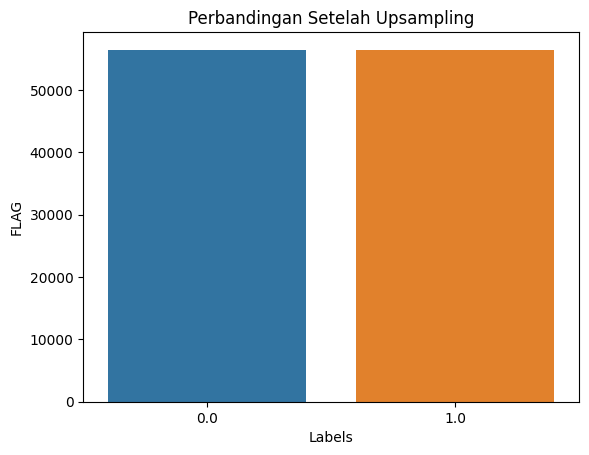

In [ ]:
oversample_plot = Y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','FLAG']
print(oversample_plot)
sns.barplot(x='Labels',y='FLAG',data=oversample_plot);
plt.title('Perbandingan Setelah Upsampling');

## Model


### Decision Tree

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.793161929312801
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88     13541
         1.0       0.10      0.20      0.14      1200

    accuracy                           0.79     14741
   macro avg       0.51      0.52      0.51     14741
weighted avg       0.86      0.79      0.82     14741



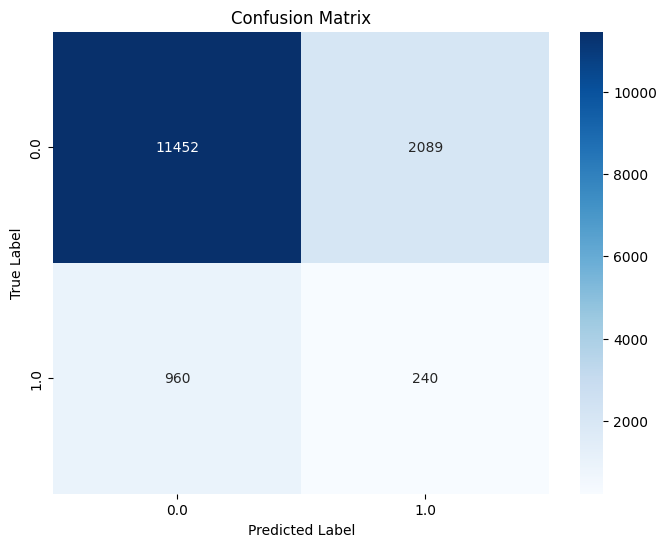

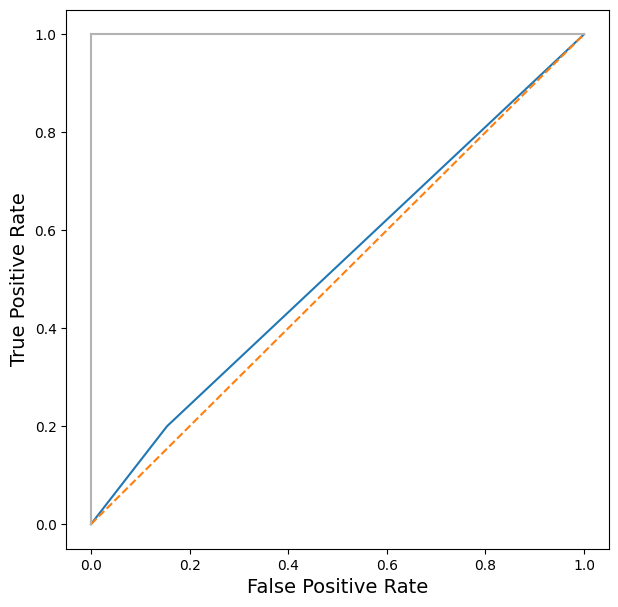

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.795197069398277
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88     13541
         1.0       0.10      0.20      0.13      1200

    accuracy                           0.80     14741
   macro avg       0.51      0.52      0.51     14741
weighted avg       0.86      0.80      0.82     14741



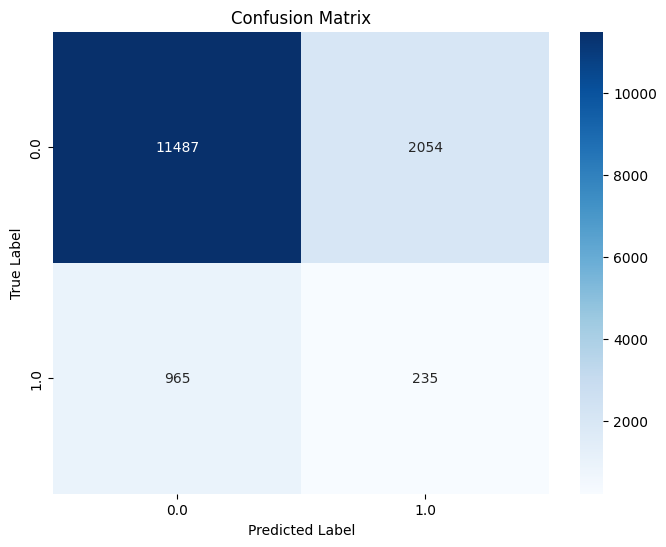

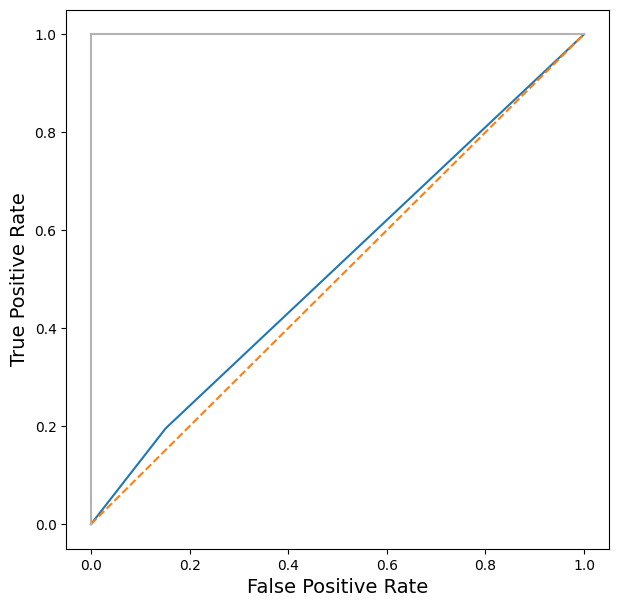

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_probs = dtc.predict_proba(X_test)[:, 1]

new_threshold = 0.6
Y_pred = (Y_probs > new_threshold).astype(int)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

### Random Forest

Training accuracy of Random Forest is : 0.7998565787842838
Test accuracy of Random Forest is : 0.7241028424123194
[[10137  3404]
 [  663   537]]
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83     13541
         1.0       0.14      0.45      0.21      1200

    accuracy                           0.72     14741
   macro avg       0.54      0.60      0.52     14741
weighted avg       0.87      0.72      0.78     14741



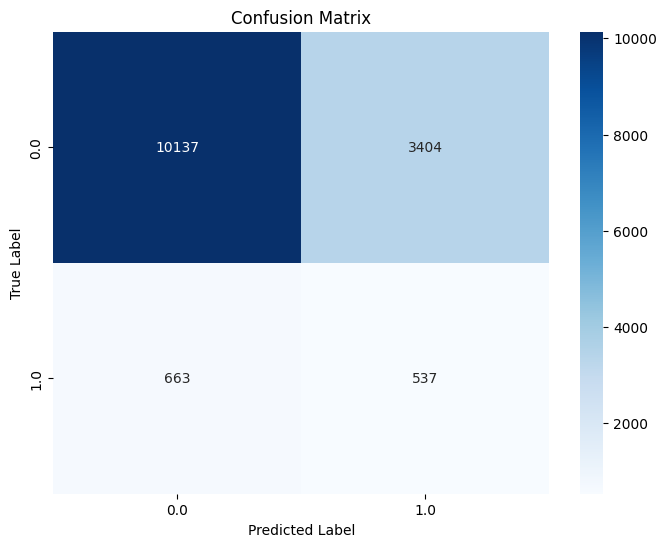

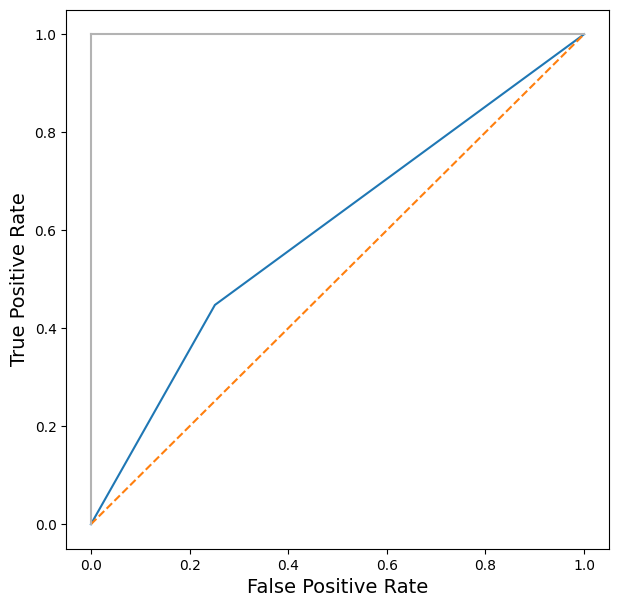

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf = RandomForestClassifier(criterion= 'entropy',
                                  max_depth= 10,
                                  max_features= 'sqrt',
                                  min_samples_leaf= 1,
                                  min_samples_split= 3,
                                  n_estimators= 140)
rand_clf.fit(X_train, Y_train)

Y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, Y_pred)
print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=rand_clf.classes_, yticklabels=rand_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

Training accuracy of Random Forest is : 0.7979708553924606
Test accuracy of Random Forest is : 0.42419103181602336
[[5356 8185]
 [ 303  897]]
              precision    recall  f1-score   support

         0.0       0.95      0.40      0.56     13541
         1.0       0.10      0.75      0.17      1200

    accuracy                           0.42     14741
   macro avg       0.52      0.57      0.37     14741
weighted avg       0.88      0.42      0.53     14741



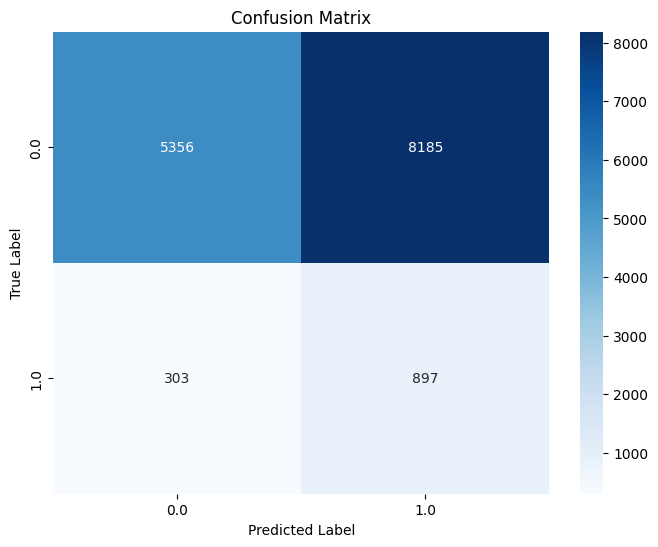

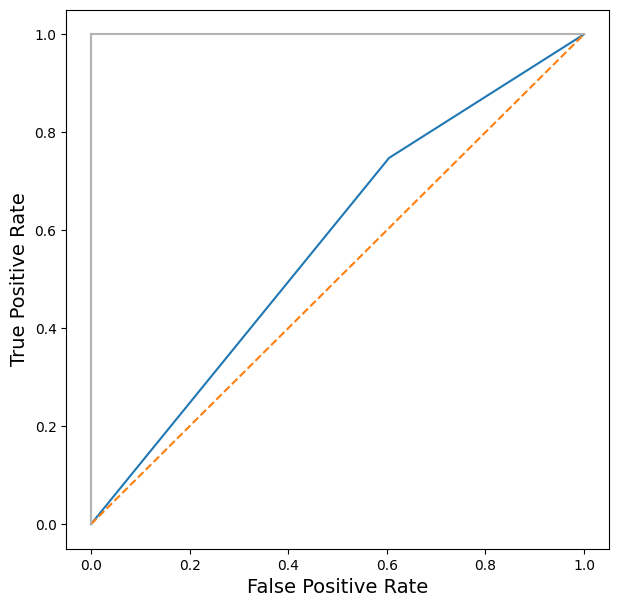

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf = RandomForestClassifier(criterion= 'entropy',
                                  max_depth= 10,
                                  max_features= 'sqrt',
                                  min_samples_leaf= 1,
                                  min_samples_split= 3,
                                  n_estimators= 140)
rand_clf.fit(X_train, Y_train)

Y_probs = rand_clf.predict_proba(X_test)[:, 1]

new_threshold = 0.35
Y_pred = (Y_probs > new_threshold).astype(int)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, Y_pred)
print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=rand_clf.classes_, yticklabels=rand_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

### Gradient Boost

Training Accuracy of Gradient Boosting Classifier is 0.884661012447545
Test Accuracy of Gradient Boosting Classifier is 0.8483820636320467 

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     13541
         1.0       0.16      0.20      0.18      1200

    accuracy                           0.85     14741
   macro avg       0.54      0.55      0.55     14741
weighted avg       0.87      0.85      0.86     14741



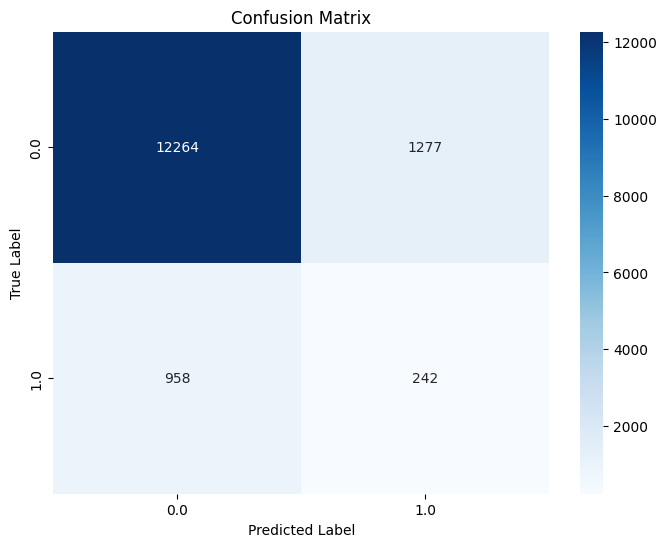

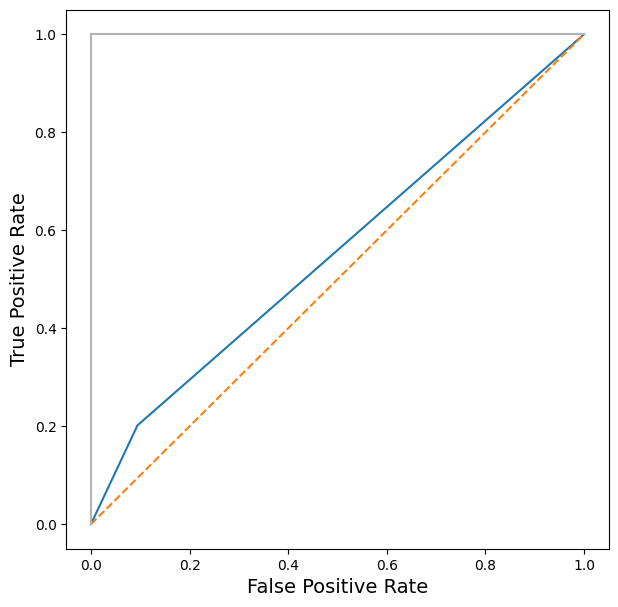

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

gb_acc = accuracy_score(Y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(Y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Classification Report :- \n {classification_report(Y_test, gb.predict(X_test))}")

Y_pred = gb.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

Training Accuracy of Gradient Boosting Classifier is 0.884661012447545
Test Accuracy of Gradient Boosting Classifier is 0.8483820636320467 

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     13541
         1.0       0.16      0.20      0.18      1200

    accuracy                           0.85     14741
   macro avg       0.54      0.55      0.55     14741
weighted avg       0.87      0.85      0.86     14741



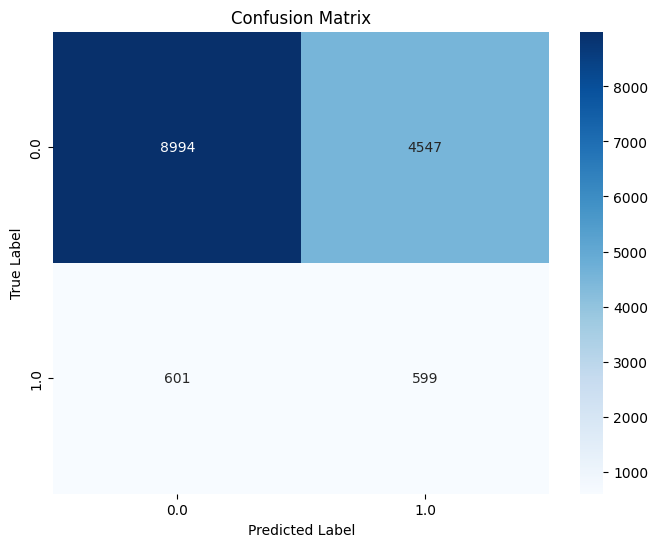

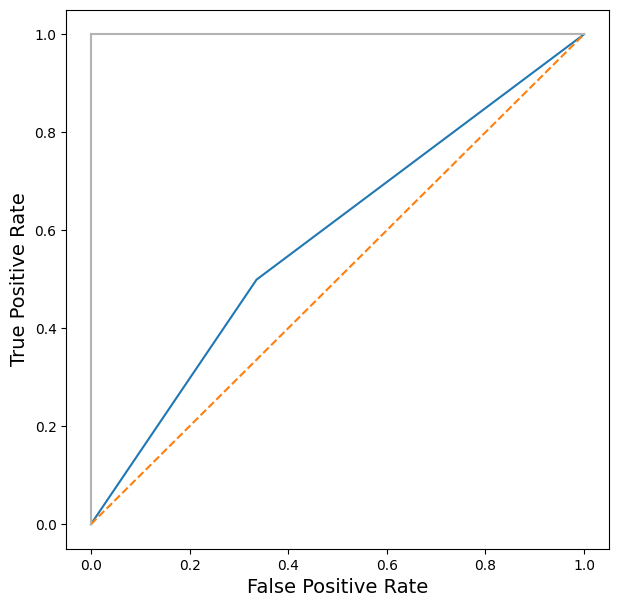

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

gb_acc = accuracy_score(Y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(Y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Classification Report :- \n {classification_report(Y_test, gb.predict(X_test))}")

Y_probs = gb.predict_proba(X_test)[:, 1]

new_threshold = 0.35
Y_pred = (Y_probs > new_threshold).astype(int)

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

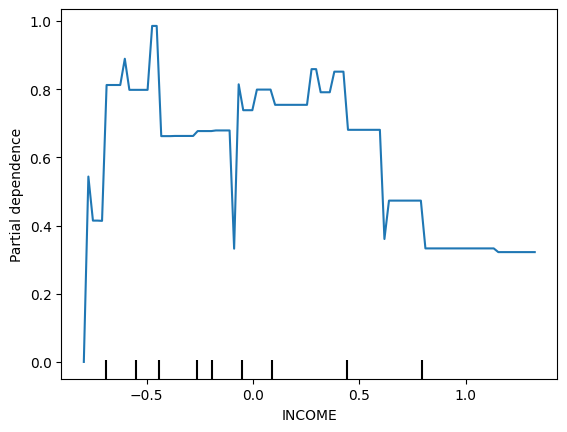

In [ ]:
features = [28]
pdp = PartialDependenceDisplay.from_estimator(gb, X_test,features,feature_names=col_f, centered = True)

### XGBoost

Training accuracy of XgBoost is : 0.9931122403810401
Test accuracy of XgBoost is : 0.8439725934468489
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91     13541
         1.0       0.14      0.18      0.16      1200

    accuracy                           0.84     14741
   macro avg       0.53      0.54      0.54     14741
weighted avg       0.86      0.84      0.85     14741



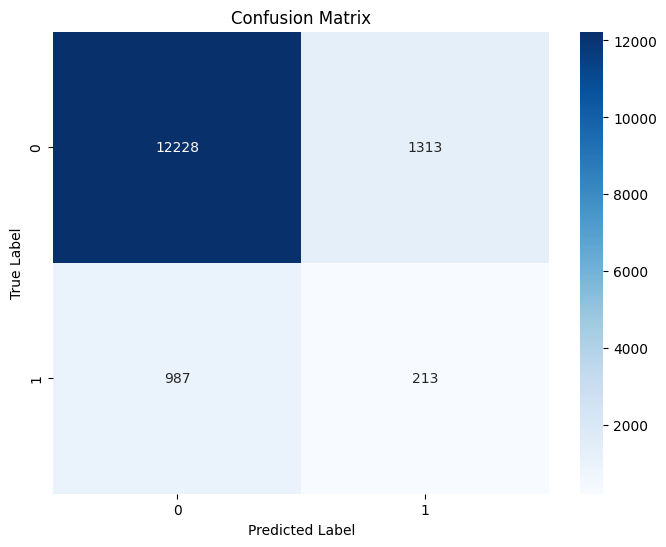

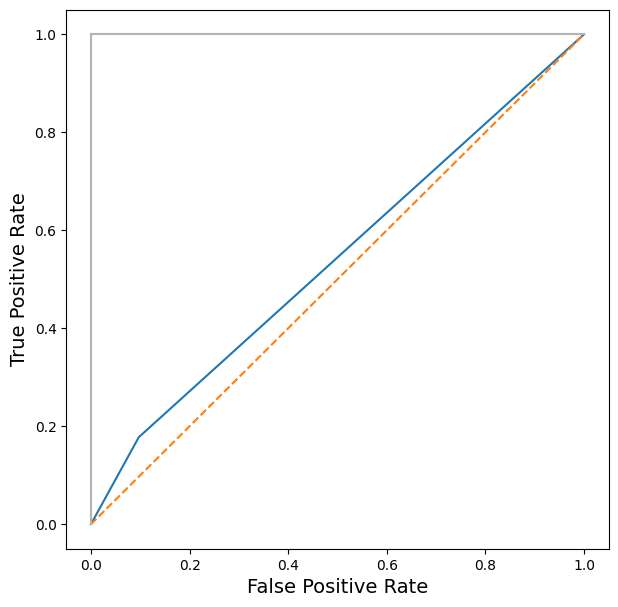

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=13541/1200, max_depth=11)
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

Training accuracy of XgBoost is : 0.9931122403810401
Test accuracy of XgBoost is : 0.8154127942473374
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     13541
         1.0       0.13      0.23      0.17      1200

    accuracy                           0.82     14741
   macro avg       0.53      0.55      0.53     14741
weighted avg       0.86      0.82      0.84     14741



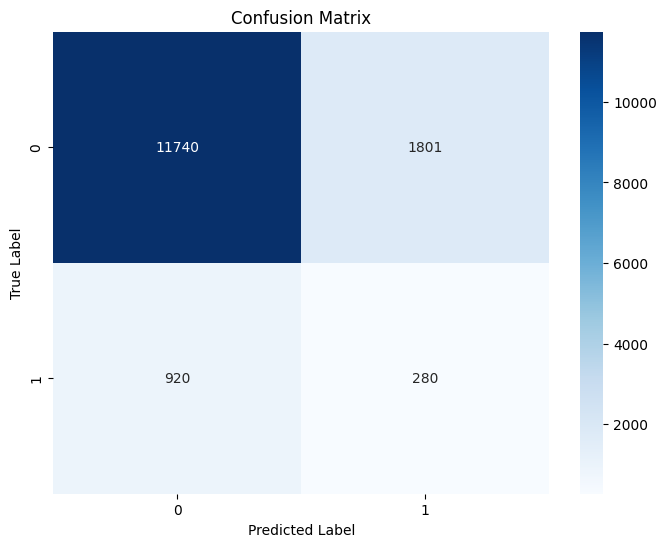

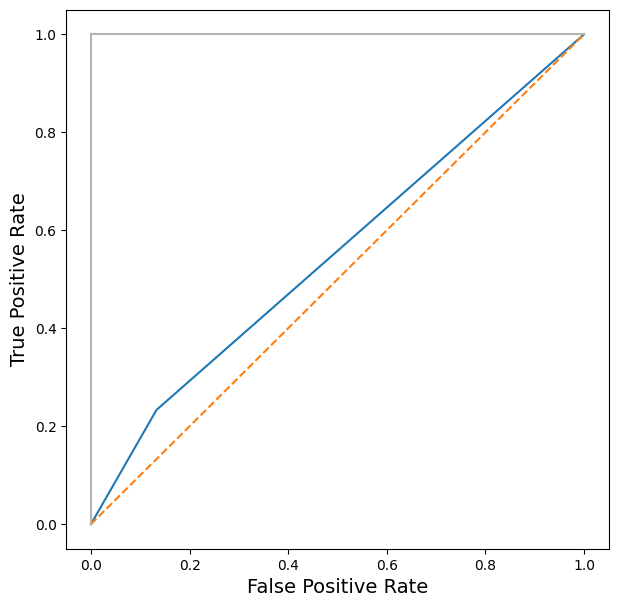

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=13541/1200, max_depth=11)
xgb.fit(X_train, Y_train)

# Train the model
xgb.fit(X_train, Y_train)

Y_probs = xgb.predict_proba(X_test)[:, 1]

new_threshold = 0.4
Y_pred = (Y_probs > new_threshold).astype(int)

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

### CatBoost

0:	learn: 0.5878634	total: 270ms	remaining: 2m 14s
1:	learn: 0.5115011	total: 509ms	remaining: 2m 6s
2:	learn: 0.4530521	total: 759ms	remaining: 2m 5s
3:	learn: 0.4072954	total: 1.01s	remaining: 2m 5s
4:	learn: 0.3727814	total: 1.26s	remaining: 2m 5s
5:	learn: 0.3480285	total: 1.5s	remaining: 2m 3s
6:	learn: 0.3272665	total: 1.64s	remaining: 1m 55s
7:	learn: 0.3104091	total: 1.89s	remaining: 1m 56s
8:	learn: 0.2981904	total: 2.16s	remaining: 1m 57s
9:	learn: 0.2883149	total: 2.4s	remaining: 1m 57s
10:	learn: 0.2798829	total: 2.63s	remaining: 1m 57s
11:	learn: 0.2733229	total: 2.87s	remaining: 1m 56s
12:	learn: 0.2668256	total: 3.14s	remaining: 1m 57s
13:	learn: 0.2623520	total: 3.39s	remaining: 1m 57s
14:	learn: 0.2563574	total: 3.64s	remaining: 1m 57s
15:	learn: 0.2531423	total: 3.9s	remaining: 1m 58s
16:	learn: 0.2492888	total: 4.3s	remaining: 2m 2s
17:	learn: 0.2477465	total: 4.38s	remaining: 1m 57s
18:	learn: 0.2454931	total: 4.77s	remaining: 2m
19:	learn: 0.2432566	total: 5.21s	re

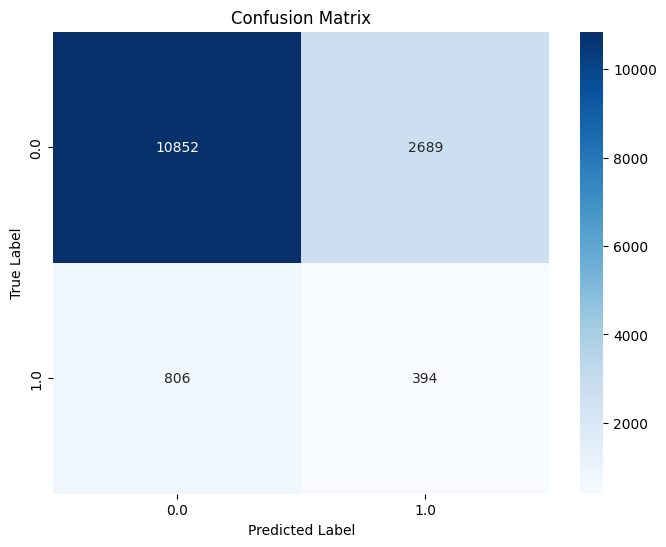

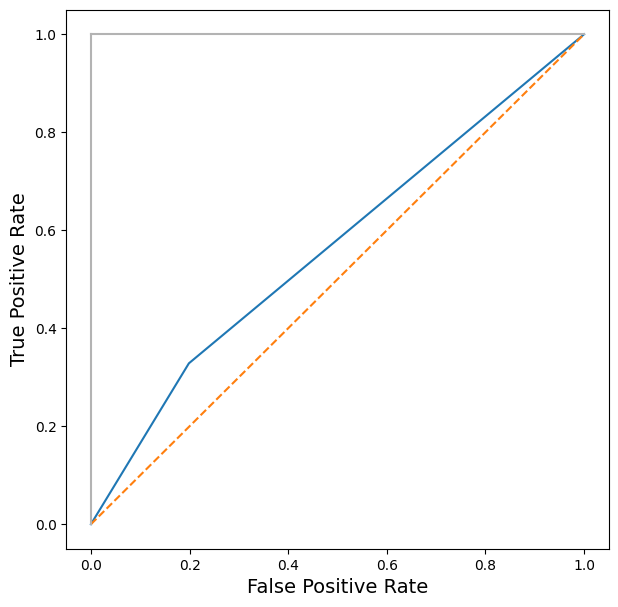

In [ ]:
import catboost
from catboost import CatBoostClassifier  # or CatBoostRegressor for regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cat_model = CatBoostClassifier(iterations=500,
                               depth=12,
                               learning_rate=0.1,
                               loss_function='Logloss',
                               cat_features=[],
                               random_seed=42,
                               class_weights=[1200,13541])

cat_model.fit(X_train, Y_train)

Y_pred = cat_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

0:	learn: 0.5878634	total: 421ms	remaining: 3m 29s
1:	learn: 0.5115011	total: 814ms	remaining: 3m 22s
2:	learn: 0.4530521	total: 1.22s	remaining: 3m 22s
3:	learn: 0.4072954	total: 1.61s	remaining: 3m 19s
4:	learn: 0.3727814	total: 1.99s	remaining: 3m 16s
5:	learn: 0.3480285	total: 2.39s	remaining: 3m 16s
6:	learn: 0.3272665	total: 2.61s	remaining: 3m 3s
7:	learn: 0.3104091	total: 3.01s	remaining: 3m 5s
8:	learn: 0.2981904	total: 3.39s	remaining: 3m 5s
9:	learn: 0.2883149	total: 3.76s	remaining: 3m 4s
10:	learn: 0.2798829	total: 4.14s	remaining: 3m 4s
11:	learn: 0.2733229	total: 4.38s	remaining: 2m 58s
12:	learn: 0.2668256	total: 4.62s	remaining: 2m 53s
13:	learn: 0.2623520	total: 4.87s	remaining: 2m 48s
14:	learn: 0.2563574	total: 5.12s	remaining: 2m 45s
15:	learn: 0.2531423	total: 5.36s	remaining: 2m 42s
16:	learn: 0.2492888	total: 5.62s	remaining: 2m 39s
17:	learn: 0.2477465	total: 5.66s	remaining: 2m 31s
18:	learn: 0.2454931	total: 5.87s	remaining: 2m 28s
19:	learn: 0.2432566	total:

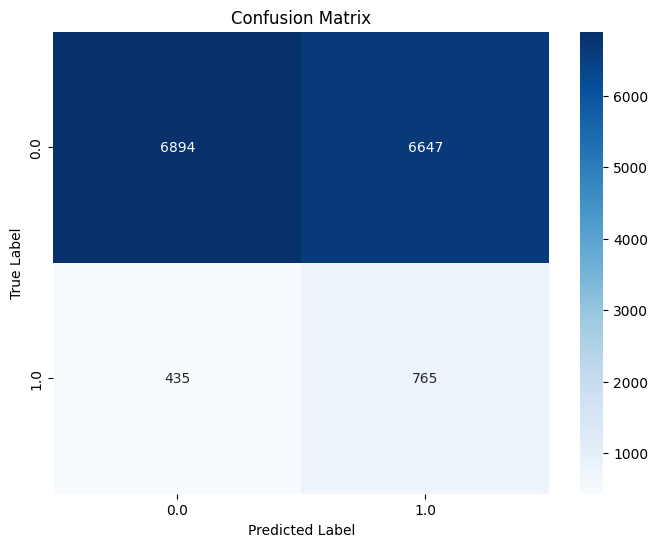

In [ ]:
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cat_model = CatBoostClassifier(iterations=500,
                               depth=12,
                               learning_rate=0.1,
                               loss_function='Logloss',
                               cat_features=[],
                               random_seed=42,
                               class_weights=[1200,13541])

cat_model.fit(X_train, Y_train)

Y_probs = cat_model.predict_proba(X_test)[:, 1]

new_threshold = 0.2
Y_pred = (Y_probs > new_threshold).astype(int)

print(classification_report(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



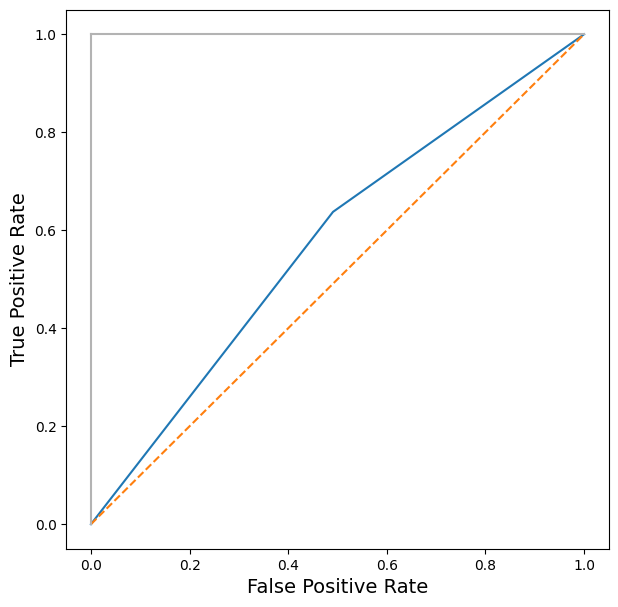

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

### AdaBoost

Accuracy: 0.8506

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     13541
         1.0       0.10      0.11      0.11      1200

    accuracy                           0.85     14741
   macro avg       0.51      0.51      0.51     14741
weighted avg       0.85      0.85      0.85     14741



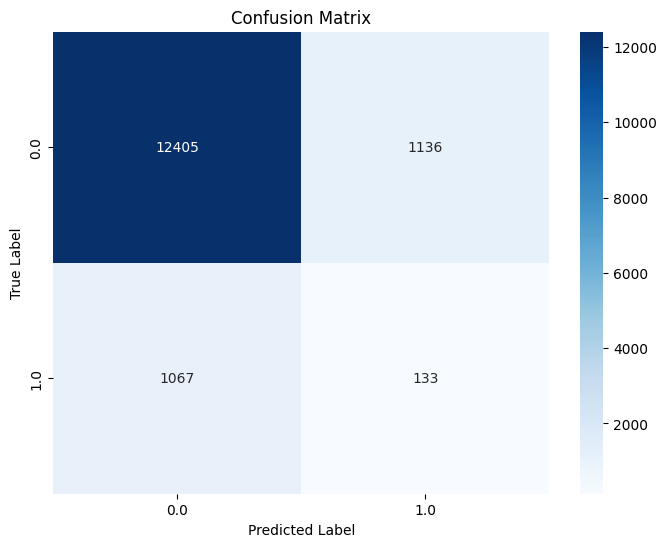

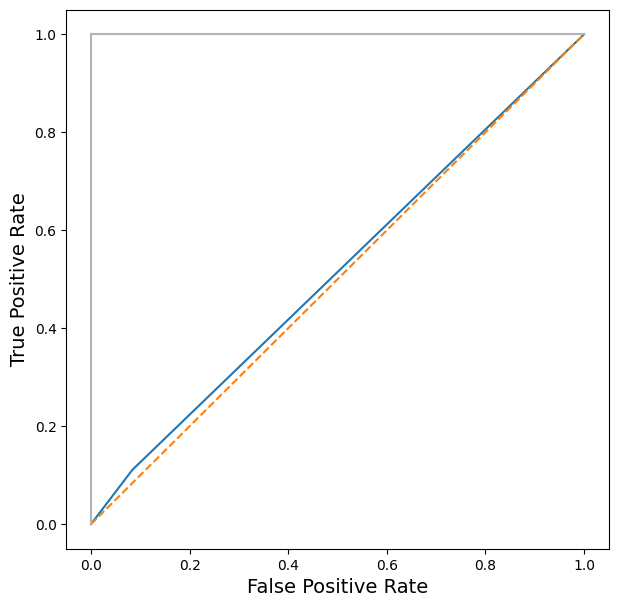

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create AdaBoost model with DecisionTree as base learner
base_model = DecisionTreeClassifier(max_depth=10)  # Shallow decision tree
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy_1 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy_1:.4f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

Accuracy: 0.6086

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.61      0.74     13541
         1.0       0.11      0.55      0.19      1200

    accuracy                           0.61     14741
   macro avg       0.53      0.58      0.46     14741
weighted avg       0.87      0.61      0.70     14741



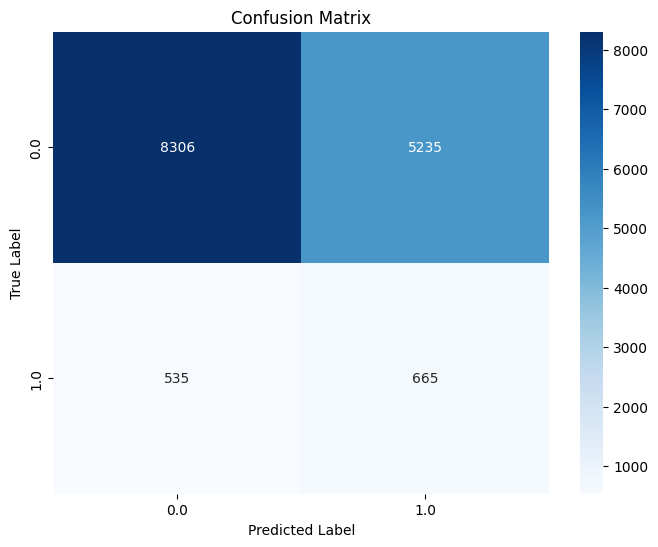

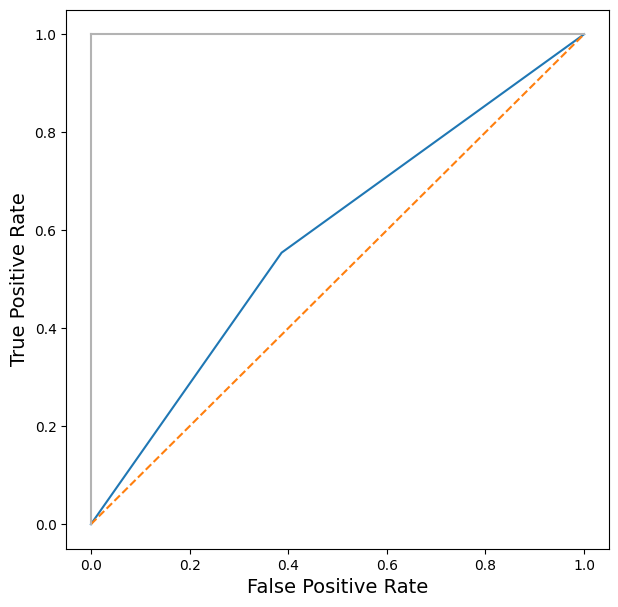

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create AdaBoost model with DecisionTree as base learner
base_model = DecisionTreeClassifier(max_depth=1)  # Shallow decision tree
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, Y_train)

# Predict probabilities
Y_probs = adaboost_model.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class

# Set a new threshold (e.g., 0.3)
new_threshold = 0.4975
Y_pred = (Y_probs > new_threshold).astype(int)

# Evaluate the model
accuracy_1 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy_1:.4f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

### Feature Importance

In [ ]:
feature_importance_xgb = xgb.feature_importances_

feature_importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_xgb})

feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

print(feature_importance_df_xgb)

                                    Feature  Importance
0             CONTRACT_TYPE_Revolving loans       0.072
10                EDUCATION_Lower secondary       0.068
18        HOUSING_CATEGORY_Office apartment       0.063
4             INCOME_CATEGORY_State servant       0.056
9               EDUCATION_Incomplete higher       0.055
8                EDUCATION_Higher education       0.055
23                        APPLY_DAYS_SUNDAY       0.045
15                      FAMILY_STATUS_Widow       0.038
13                  FAMILY_STATUS_Separated       0.037
19        HOUSING_CATEGORY_Rented apartment       0.036
36                               APPLY_HOUR       0.034
28                                   INCOME       0.031
17     HOUSING_CATEGORY_Municipal apartment       0.031
3                 INCOME_CATEGORY_Pensioner       0.031
22                      APPLY_DAYS_SATURDAY       0.026
20            HOUSING_CATEGORY_With parents       0.025
26                     APPLY_DAYS_WEDNESDAY     

In [ ]:

# Get feature importances
feature_importance_cat = cat_model.feature_importances_
# Create a DataFrame with feature names and their importance scores
feature_importance_df_cat = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_cat})
# Sort the DataFrame by importance scores in descending order
feature_importance_df_cat = feature_importance_df_cat.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df_cat)

                                    Feature  Importance
36                               APPLY_HOUR      43.401
28                                   INCOME       6.671
27                          NUM_OF_CHILDREN       4.150
34                        DAYS_REGISTRATION       3.964
35                     DAYS_SINCE_ID_CHANGE       3.894
32                                 DAYS_AGE       3.633
33                                DAYS_WORK       3.591
30                             LOAN_ANNUITY       3.289
7                   INCOME_CATEGORY_Working       2.998
31                            PRODUCT_PRICE       2.960
29                          APPROVED_CREDIT       2.818
2      INCOME_CATEGORY_Commercial associate       2.353
12                    FAMILY_STATUS_Married       1.616
8                EDUCATION_Higher education       1.415
3                 INCOME_CATEGORY_Pensioner       1.372
11  EDUCATION_Secondary / secondary special       1.324
1                                  GENDER_M     

In [ ]:
feature_importance_gb = gb.feature_importances_

feature_importance_df_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_gb})

feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

print(feature_importance_df_gb)

                                    Feature  Importance
36                               APPLY_HOUR       0.250
28                                   INCOME       0.192
31                            PRODUCT_PRICE       0.074
8                EDUCATION_Higher education       0.062
33                                DAYS_WORK       0.059
0             CONTRACT_TYPE_Revolving loans       0.037
32                                 DAYS_AGE       0.033
21                        APPLY_DAYS_MONDAY       0.028
24                      APPLY_DAYS_THURSDAY       0.025
25                       APPLY_DAYS_TUESDAY       0.024
26                     APPLY_DAYS_WEDNESDAY       0.023
22                      APPLY_DAYS_SATURDAY       0.023
23                        APPLY_DAYS_SUNDAY       0.019
14       FAMILY_STATUS_Single / not married       0.017
12                    FAMILY_STATUS_Married       0.017
4             INCOME_CATEGORY_State servant       0.016
11  EDUCATION_Secondary / secondary special     

# Choosing The Model

0:	learn: 0.5877486	total: 243ms	remaining: 2m 1s
1:	learn: 0.5112448	total: 503ms	remaining: 2m 5s
2:	learn: 0.4529902	total: 737ms	remaining: 2m 2s
3:	learn: 0.4073561	total: 981ms	remaining: 2m 1s
4:	learn: 0.3731850	total: 1.22s	remaining: 2m
5:	learn: 0.3483832	total: 1.47s	remaining: 2m
6:	learn: 0.3275584	total: 1.61s	remaining: 1m 53s
7:	learn: 0.3106249	total: 1.85s	remaining: 1m 54s
8:	learn: 0.2982218	total: 2.09s	remaining: 1m 53s
9:	learn: 0.2881936	total: 2.39s	remaining: 1m 57s
10:	learn: 0.2797248	total: 2.76s	remaining: 2m 2s
11:	learn: 0.2731062	total: 2.99s	remaining: 2m 1s
12:	learn: 0.2665960	total: 3.23s	remaining: 2m 1s
13:	learn: 0.2620294	total: 3.49s	remaining: 2m 1s
14:	learn: 0.2557065	total: 3.73s	remaining: 2m
15:	learn: 0.2525927	total: 3.97s	remaining: 2m
16:	learn: 0.2487683	total: 4.22s	remaining: 1m 59s
17:	learn: 0.2472297	total: 4.26s	remaining: 1m 54s
18:	learn: 0.2449397	total: 4.49s	remaining: 1m 53s
19:	learn: 0.2428059	total: 4.73s	remaining: 1

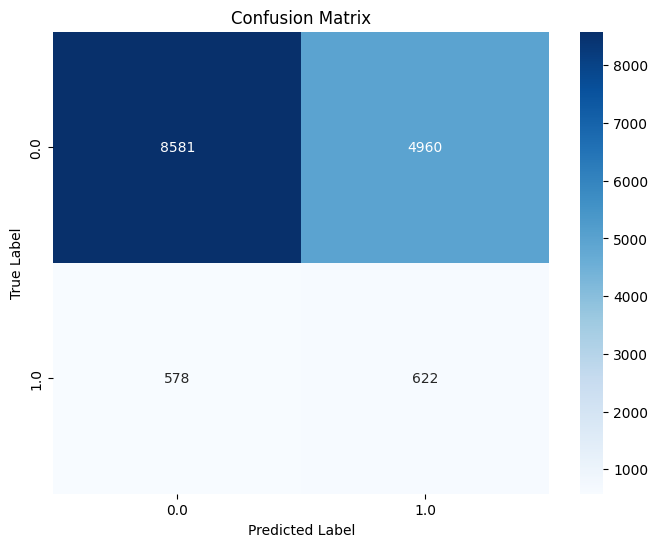

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

gb_acc = accuracy_score(Y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(Y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Classification Report :- \n {classification_report(Y_test, gb.predict(X_test))}")

Y_probs = gb.predict_proba(X_test)[:, 1]

new_threshold = 0.35
Y_pred = (Y_probs > new_threshold).astype(int)

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

In [ ]:
Y_model = cat_model.predict_proba(X)[:, 1]
new_threshold = 0.3
Y_pred2 = (Y_model > new_threshold).astype(int)

In [ ]:
len(Y_pred2)

76181

In [ ]:
df_fin = df.drop(columns = ['type','FLAG'])

In [ ]:
df_fin['FLAG'] = Y_pred2.tolist()

In [ ]:
len(df_fin['U_ID'].unique())

76181

In [ ]:
df_fin

,U_ID,CONTRACT_TYPE,GENDER,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,INCOME_CATEGORY,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_DAYS,APPLY_HOUR,ORGANIZATION_CATEGORY,FLAG
0,333538,Revolving loans,F,1,67500.000,202500.000,10125.000,202500.000,Working,Secondary / secondary special,Married,With parents,-11539,-921,-119.000,-2757,TUESDAY,18,Business Entity Type 3,0
1,406644,Cash loans,F,1,202500.000,976711.500,49869.000,873000.000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,-1797.000,-2455,TUESDAY,14,Other,0
2,259130,Cash loans,F,0,180000.000,407520.000,25060.500,360000.000,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,365243,-8737.000,-4312,THURSDAY,14,NA1,0
3,411997,Cash loans,M,0,225000.000,808650.000,26086.500,675000.000,State servant,Higher education,Married,House / apartment,-20659,-10455,-4998.000,-4010,WEDNESDAY,10,Culture,0
4,241559,Revolving loans,M,0,135000.000,180000.000,9000.000,180000.000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-3524.000,-1644,SUNDAY,11,Construction,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76259,144293,Cash loans,F,1,67500.000,112500.000,7317.000,112500.000,Working,Secondary / secondary special,Married,House / apartment,-12866,-3154,-1251.000,-4395,TUESDAY,10,Government,0
76260,272093,Cash loans,F,1,135000.000,313438.500,21073.500,283500.000,Working,Secondary / secondary special,Civil marriage,With parents,-11421,-3962,-5247.000,-3795,SATURDAY,7,Self-employed,1
76261,251117,Cash loans,F,0,157500.000,1078200.000,31522.500,900000.000,State servant,Higher education,Separated,House / apartment,-13313,-2258,-3899.000,-4515,MONDAY,12,Other,0
76262,334313,Cash loans,F,0,216000.000,272520.000,21658.500,225000.000,Pensioner,Secondary / secondary special,Widow,House / apartment,-24085,365243,-9354.000,-4740,THURSDAY,15,NA1,0


In [ ]:
df_fin = df_fin.reset_index(drop=True)

# Prev App + Train/Test

In [ ]:
df2_comb

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Approved,-73,12.000,middle,-42.000,-37.000,0.000,0.031
1,2819243,176158,Cash loans,47041.335,450000.000,470790.000,0.000,450000.000,MONDAY,7,Approved,-512,12.000,middle,-482.000,-177.000,1.000,0.029
2,1383531,199383,Cash loans,23703.930,315000.000,340573.500,0.000,315000.000,SATURDAY,8,Approved,-684,18.000,low_normal,-654.000,-137.000,1.000,0.025
3,1715995,447712,Cash loans,11368.620,270000.000,335754.000,0.000,270000.000,FRIDAY,7,Approved,-735,54.000,low_normal,-705.000,-334.000,1.000,0.025
4,1151694,161591,Consumer loans,39111.075,214380.000,209497.500,13500.000,214380.000,FRIDAY,12,Approved,-989,6.000,middle,-958.000,-804.000,0.000,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213457,1253882,273656,Cash loans,33362.145,405000.000,458460.000,0.000,405000.000,SATURDAY,13,Refused,-20,24.000,high,NaN,NaN,NaN,NaN
213458,2656210,223981,Cash loans,26316.000,900000.000,900000.000,0.000,900000.000,THURSDAY,17,Refused,-32,60.000,low_normal,NaN,NaN,NaN,NaN
213459,1229066,237195,Cash loans,18534.510,225000.000,254700.000,0.000,225000.000,WEDNESDAY,9,Refused,-376,24.000,high,NaN,NaN,NaN,NaN
213460,1379569,309506,Cash loans,33389.100,1035000.000,1035000.000,0.000,1035000.000,THURSDAY,10,Refused,-156,60.000,low_normal,NaN,NaN,NaN,NaN


In [ ]:
len(df2_comb['U_ID'].unique())

67258

In [ ]:
df2_comb.loc[2].tolist()

[1383531,
 199383,
 'Cash loans',
 23703.93,
 315000.0,
 340573.5,
 0.0,
 315000.0,
 'SATURDAY',
 8,
 'Approved',
 -684,
 18.0,
 'low_normal',
 -654.0,
 -137.0,
 1.0,
 0.024883372592607842]

In [ ]:
df_fin_sort = df_fin.sort_values(by='U_ID')

In [ ]:
df_fin_sort2 = df_fin_sort.reset_index(drop=True)

In [ ]:
df_fin_sort2

,U_ID,CONTRACT_TYPE,GENDER,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,INCOME_CATEGORY,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_SINCE_ID_CHANGE,APPLY_DAYS,APPLY_HOUR,ORGANIZATION_CATEGORY,FLAG
0,100009,Cash loans,F,1,171000.000,1560726.000,41301.000,1395000.000,Commercial associate,Higher education,Married,House / apartment,-13778,-3130,-1213.000,-619,SUNDAY,16,Business Entity Type 3,0
1,100039,Cash loans,M,1,360000.000,733315.500,39069.000,679500.000,Commercial associate,Secondary / secondary special,Married,House / apartment,-11694,-2060,-3557.000,-3557,THURSDAY,10,Self-employed,1
2,100044,Cash loans,M,0,121500.000,454500.000,15151.500,454500.000,Working,Secondary / secondary special,Married,House / apartment,-21077,-1288,-5474.000,-4270,FRIDAY,10,Transport: type 4,1
3,100045,Cash loans,F,0,99000.000,247275.000,17338.500,225000.000,Pensioner,Secondary / secondary special,Married,House / apartment,-23920,365243,-9817.000,-4969,FRIDAY,11,NA1,1
4,100046,Revolving loans,M,0,180000.000,540000.000,27000.000,540000.000,Working,Higher education,Married,House / apartment,-16126,-1761,-8236.000,-4292,TUESDAY,8,Business Entity Type 3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76176,456247,Cash loans,F,0,112500.000,345510.000,17770.500,247500.000,Commercial associate,Higher education,Single / not married,House / apartment,-11870,-399,-675.000,-3936,SATURDAY,11,Bank,1
76177,456248,Cash loans,F,0,153000.000,331920.000,16096.500,225000.000,Working,Secondary / secondary special,Separated,House / apartment,-16705,-7258,-9798.000,-259,WEDNESDAY,11,Self-employed,0
76178,456249,Cash loans,F,0,112500.000,225000.000,22050.000,225000.000,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,-7369.000,-2357,MONDAY,15,NA1,0
76179,456252,Cash loans,F,0,72000.000,269550.000,12001.500,225000.000,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,-4388.000,-4090,MONDAY,8,NA1,1


In [ ]:
def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        mid_value = arr[mid]

        if mid_value == target:
            return mid  # Element found, return its index
        elif mid_value < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1  # Element not found

In [ ]:
flag = []
for i in df2_comb.index.tolist():
  try:
    target = df2_comb['U_ID'][i]
    index = binary_search(df_fin_sort2['U_ID'].tolist(),target)
    flag.append(df_fin_sort2['FLAG'][index])
  except KeyError:
    flag.append(None)

In [ ]:
df2_comb['FLAG'] = flag

In [ ]:
df2_comb

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Approved,-73,12.000,middle,-42.000,-37.000,0.000,0.031,0.000
1,2819243,176158,Cash loans,47041.335,450000.000,470790.000,0.000,450000.000,MONDAY,7,Approved,-512,12.000,middle,-482.000,-177.000,1.000,0.029,0.000
2,1383531,199383,Cash loans,23703.930,315000.000,340573.500,0.000,315000.000,SATURDAY,8,Approved,-684,18.000,low_normal,-654.000,-137.000,1.000,0.025,0.000
3,1715995,447712,Cash loans,11368.620,270000.000,335754.000,0.000,270000.000,FRIDAY,7,Approved,-735,54.000,low_normal,-705.000,-334.000,1.000,0.025,0.000
4,1151694,161591,Consumer loans,39111.075,214380.000,209497.500,13500.000,214380.000,FRIDAY,12,Approved,-989,6.000,middle,-958.000,-804.000,0.000,0.033,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213457,1253882,273656,Cash loans,33362.145,405000.000,458460.000,0.000,405000.000,SATURDAY,13,Refused,-20,24.000,high,NaN,NaN,NaN,NaN,1.000
213458,2656210,223981,Cash loans,26316.000,900000.000,900000.000,0.000,900000.000,THURSDAY,17,Refused,-32,60.000,low_normal,NaN,NaN,NaN,NaN,0.000
213459,1229066,237195,Cash loans,18534.510,225000.000,254700.000,0.000,225000.000,WEDNESDAY,9,Refused,-376,24.000,high,NaN,NaN,NaN,NaN,1.000
213460,1379569,309506,Cash loans,33389.100,1035000.000,1035000.000,0.000,1035000.000,THURSDAY,10,Refused,-156,60.000,low_normal,NaN,NaN,NaN,NaN,0.000


In [ ]:
df2_comb[(df2_comb.CONTRACT_STATUS=='Refused') & (df2_comb.FLAG==0)]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG
160688,2724439,163961,Cash loans,39369.600,360000.000,360000.000,0.000,360000.000,WEDNESDAY,12,Refused,-2337,12.000,high,NaN,NaN,NaN,NaN,0.000
160689,1656819,324462,Consumer loans,NaN,112711.095,112711.095,0.000,112711.095,THURSDAY,13,Refused,-1075,NaN,NA1,NaN,NaN,NaN,NaN,0.000
160694,2447477,274840,Revolving loans,9000.000,180000.000,180000.000,0.000,180000.000,WEDNESDAY,12,Refused,-223,0.000,NA1,NaN,NaN,NaN,NaN,0.000
160695,2319125,218182,Revolving loans,22500.000,337500.000,900000.000,0.000,337500.000,TUESDAY,12,Refused,-667,0.000,NA1,NaN,NaN,NaN,NaN,0.000
160696,1250709,438887,Cash loans,11110.365,135000.000,170640.000,0.000,135000.000,SATURDAY,8,Refused,-194,24.000,middle,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213454,1014598,424811,Consumer loans,11173.095,118305.000,118305.000,0.000,118305.000,TUESDAY,17,Refused,-1003,12.000,low_normal,NaN,NaN,NaN,NaN,0.000
213455,2072405,205414,Cash loans,34122.600,1129500.000,1293502.500,0.000,1129500.000,FRIDAY,13,Refused,-180,60.000,low_action,NaN,NaN,NaN,NaN,0.000
213458,2656210,223981,Cash loans,26316.000,900000.000,900000.000,0.000,900000.000,THURSDAY,17,Refused,-32,60.000,low_normal,NaN,NaN,NaN,NaN,0.000
213460,1379569,309506,Cash loans,33389.100,1035000.000,1035000.000,0.000,1035000.000,THURSDAY,10,Refused,-156,60.000,low_normal,NaN,NaN,NaN,NaN,0.000


In [ ]:
df2_comb[(df2_comb.FLAG!=0) & (df2_comb.FLAG!=1)]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG
921,1438495,377705,Consumer loans,2448.855,24250.500,24129.000,2425.500,24250.500,SATURDAY,13,Approved,-547,12.000,middle,-516.000,-406.000,0.000,0.032,NaN
1187,2826914,107822,Consumer loans,4232.700,32571.000,31729.500,3258.000,32571.000,WEDNESDAY,18,Approved,-2282,10.000,low_normal,-2251.000,-2005.000,1.000,0.056,NaN
1841,2274477,274382,Consumer loans,9202.500,43173.000,34537.500,8635.500,43173.000,SUNDAY,15,Approved,-690,4.000,middle,-659.000,-564.000,0.000,0.026,NaN
3351,1999321,452992,Consumer loans,4018.410,31500.000,34272.000,0.000,31500.000,MONDAY,12,Approved,-1080,10.000,middle,-1045.000,-765.000,0.000,0.030,NaN
6786,2630415,181966,Consumer loans,4663.710,35887.500,34960.500,3591.000,35887.500,MONDAY,13,Approved,-2669,10.000,low_normal,-2638.000,-2362.000,1.000,0.056,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210962,2460263,268295,Cash loans,14517.000,450000.000,450000.000,0.000,450000.000,TUESDAY,15,Refused,-558,60.000,low_normal,NaN,NaN,NaN,NaN,NaN
212787,2708550,289773,Revolving loans,11250.000,225000.000,225000.000,0.000,225000.000,THURSDAY,9,Refused,-555,0.000,NA1,NaN,NaN,NaN,NaN,NaN
212792,2151326,268295,Cash loans,29677.500,1125000.000,1125000.000,0.000,1125000.000,TUESDAY,16,Refused,-746,60.000,low_action,NaN,NaN,NaN,NaN,NaN
212801,2708582,289773,Cash loans,12900.240,135000.000,161622.000,0.000,135000.000,MONDAY,10,Refused,-404,24.000,high,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1_fin2

,U_ID,PERC_ONTIME,PERC_FULL
0,100009,0.980,1.000
1,100039,0.952,1.000
2,100044,0.845,0.915
3,100045,0.641,0.906
4,100046,0.353,1.000
...,...,...,...
72296,456247,0.328,1.000
72297,456248,0.891,0.826
72298,456249,0.833,1.000
72299,456252,0.667,1.000


In [ ]:
PERC_ONTIME = []
PERC_FULL = []
for i in df2_comb.index.tolist():
  try:
    target = df2_comb['U_ID'][i]
    index = binary_search(df1_fin2['U_ID'].tolist(),target)
    PERC_ONTIME.append(df1_fin2['PERC_ONTIME'][index])
    PERC_FULL.append(df1_fin2['PERC_FULL'][index])
  except KeyError:
    PERC_ONTIME.append(None)
    PERC_FULL.append(None)

In [ ]:
len(PERC_FULL)

213462

In [ ]:
df2_comb['PERC_ONTIME'] = PERC_ONTIME
df2_comb['PERC_FULL'] = PERC_FULL

In [ ]:
df2_comb.isnull().sum()

SK_ID_PREV                       0
U_ID                             0
CONTRACT_TYPE                    0
LOAN_ANNUITY                  2637
APPLICATION                      0
APPROVED_CREDIT                  0
AMT_DOWN_PAYMENT                 0
PRODUCT_PRICE                    0
APPLY_DAYS                       0
APPLY_HOUR                       0
CONTRACT_STATUS                  0
DAYS_DECISION                    0
TERM_PAYMENT                  2637
YIELD_GROUP                      0
FIRST_DUE                    52775
TERMINATION                  52775
NFLAG_INSURED_ON_APPROVAL    52775
Interest                     52775
FLAG                           206
PERC_ONTIME                    193
PERC_FULL                      193
dtype: int64

# Cleaning the Combined Data

In [ ]:
df2_comb

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,...,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG,PERC_ONTIME,PERC_FULL
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,...,-73,12.000,middle,-42.000,-37.000,0.000,0.031,0.000,0.833,1.000
1,2819243,176158,Cash loans,47041.335,450000.000,470790.000,0.000,450000.000,MONDAY,7,...,-512,12.000,middle,-482.000,-177.000,1.000,0.029,0.000,0.693,0.800
2,1383531,199383,Cash loans,23703.930,315000.000,340573.500,0.000,315000.000,SATURDAY,8,...,-684,18.000,low_normal,-654.000,-137.000,1.000,0.025,0.000,0.844,1.000
3,1715995,447712,Cash loans,11368.620,270000.000,335754.000,0.000,270000.000,FRIDAY,7,...,-735,54.000,low_normal,-705.000,-334.000,1.000,0.025,0.000,0.635,0.496
4,1151694,161591,Consumer loans,39111.075,214380.000,209497.500,13500.000,214380.000,FRIDAY,12,...,-989,6.000,middle,-958.000,-804.000,0.000,0.033,0.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213457,1253882,273656,Cash loans,33362.145,405000.000,458460.000,0.000,405000.000,SATURDAY,13,...,-20,24.000,high,NaN,NaN,NaN,NaN,1.000,0.754,0.738
213458,2656210,223981,Cash loans,26316.000,900000.000,900000.000,0.000,900000.000,THURSDAY,17,...,-32,60.000,low_normal,NaN,NaN,NaN,NaN,0.000,0.774,0.839
213459,1229066,237195,Cash loans,18534.510,225000.000,254700.000,0.000,225000.000,WEDNESDAY,9,...,-376,24.000,high,NaN,NaN,NaN,NaN,1.000,0.583,0.625
213460,1379569,309506,Cash loans,33389.100,1035000.000,1035000.000,0.000,1035000.000,THURSDAY,10,...,-156,60.000,low_normal,NaN,NaN,NaN,NaN,0.000,0.403,0.946


In [ ]:
df2_comb.describe()

,SK_ID_PREV,U_ID,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG,PERC_ONTIME,PERC_FULL
count,213462.000,213462.000,210825.000,213462.000,213462.000,213462.000,213462.000,213462.000,213462.000,210825.000,160687.000,160687.000,160687.000,160687.000,213256.000,213269.000,213269.000
mean,1915362.742,278655.236,15387.610,208140.237,222727.330,4599.469,208169.540,12.578,-1169.222,16.119,-1251.666,-988.097,0.336,0.039,0.352,0.776,0.905
std,533330.887,102615.526,14426.774,302718.694,330402.917,16460.012,302734.991,3.309,783.830,13.633,758.456,747.631,0.472,0.017,0.478,0.201,0.144
min,1000020.000,100009.000,0.000,0.000,0.000,0.000,0.000,0.000,-2922.000,0.000,-2892.000,-2845.000,0.000,0.005,0.000,0.000,0.000
25%,1450319.000,189874.750,6137.640,47160.000,47160.000,0.000,47160.000,10.000,-1747.000,8.000,-1842.000,-1551.000,0.000,0.025,0.000,0.633,0.865
50%,1911573.500,279228.500,10812.510,99180.000,101445.750,0.000,99207.000,12.000,-957.000,12.000,-1060.000,-795.000,0.000,0.038,0.000,0.815,0.970
75%,2378221.500,367384.750,19302.570,225000.000,229603.500,4500.000,225000.000,15.000,-521.000,18.000,-619.000,-347.000,1.000,0.055,1.000,0.958,1.000
max,2845378.000,456255.000,418058.145,4050000.000,4104351.000,2150100.000,4050000.000,23.000,-2.000,84.000,-4.000,-2.000,1.000,0.105,1.000,1.000,1.000


In [ ]:
df2_comb[(df2_comb.PERC_ONTIME.isna()==True) & (df2_comb.PERC_FULL.isna()==True)]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,...,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG,PERC_ONTIME,PERC_FULL
160778,2734454,393196,Consumer loans,29249.955,308056.500,308056.500,0.000,308056.500,FRIDAY,21,...,-119,12.000,low_normal,NaN,NaN,NaN,NaN,0.000,NaN,NaN
160867,1942484,131475,Cash loans,33986.655,1125000.000,1288350.000,0.000,1125000.000,TUESDAY,9,...,-1145,60.000,low_action,NaN,NaN,NaN,NaN,1.000,NaN,NaN
160912,1474954,179103,Cash loans,17640.000,90000.000,90000.000,0.000,90000.000,THURSDAY,15,...,-2169,6.000,high,NaN,NaN,NaN,NaN,0.000,NaN,NaN
161023,1734225,439783,Consumer loans,27462.240,229302.900,247185.000,22932.900,229302.900,TUESDAY,12,...,-1836,10.000,low_normal,NaN,NaN,NaN,NaN,1.000,NaN,NaN
161523,1483710,417004,Cash loans,23775.435,675000.000,808650.000,0.000,675000.000,TUESDAY,8,...,-23,60.000,low_normal,NaN,NaN,NaN,NaN,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212551,1699798,309436,Cash loans,68386.500,2700000.000,2700000.000,0.000,2700000.000,WEDNESDAY,13,...,-6,60.000,low_action,NaN,NaN,NaN,NaN,1.000,NaN,NaN
212751,2830225,265097,Revolving loans,2250.000,45000.000,45000.000,0.000,45000.000,WEDNESDAY,11,...,-222,0.000,NA1,NaN,NaN,NaN,NaN,1.000,NaN,NaN
212919,1166315,306137,Consumer loans,14366.565,130486.500,130486.500,0.000,130486.500,FRIDAY,12,...,-1207,10.000,low_normal,NaN,NaN,NaN,NaN,0.000,NaN,NaN
213291,2689111,274592,Cash loans,47614.500,1800000.000,1800000.000,0.000,1800000.000,MONDAY,16,...,-654,60.000,low_action,NaN,NaN,NaN,NaN,0.000,NaN,NaN


In [ ]:
df2_comb[df2_comb.FLAG.isna()==True]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,...,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG,PERC_ONTIME,PERC_FULL
921,1438495,377705,Consumer loans,2448.855,24250.500,24129.000,2425.500,24250.500,SATURDAY,13,...,-547,12.000,middle,-516.000,-406.000,0.000,0.032,NaN,1.000,1.000
1187,2826914,107822,Consumer loans,4232.700,32571.000,31729.500,3258.000,32571.000,WEDNESDAY,18,...,-2282,10.000,low_normal,-2251.000,-2005.000,1.000,0.056,NaN,0.846,0.692
1841,2274477,274382,Consumer loans,9202.500,43173.000,34537.500,8635.500,43173.000,SUNDAY,15,...,-690,4.000,middle,-659.000,-564.000,0.000,0.026,NaN,1.000,1.000
3351,1999321,452992,Consumer loans,4018.410,31500.000,34272.000,0.000,31500.000,MONDAY,12,...,-1080,10.000,middle,-1045.000,-765.000,0.000,0.030,NaN,0.880,0.760
6786,2630415,181966,Consumer loans,4663.710,35887.500,34960.500,3591.000,35887.500,MONDAY,13,...,-2669,10.000,low_normal,-2638.000,-2362.000,1.000,0.056,NaN,0.889,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210962,2460263,268295,Cash loans,14517.000,450000.000,450000.000,0.000,450000.000,TUESDAY,15,...,-558,60.000,low_normal,NaN,NaN,NaN,NaN,NaN,0.821,0.964
212787,2708550,289773,Revolving loans,11250.000,225000.000,225000.000,0.000,225000.000,THURSDAY,9,...,-555,0.000,NA1,NaN,NaN,NaN,NaN,NaN,0.867,1.000
212792,2151326,268295,Cash loans,29677.500,1125000.000,1125000.000,0.000,1125000.000,TUESDAY,16,...,-746,60.000,low_action,NaN,NaN,NaN,NaN,NaN,0.821,0.964
212801,2708582,289773,Cash loans,12900.240,135000.000,161622.000,0.000,135000.000,MONDAY,10,...,-404,24.000,high,NaN,NaN,NaN,NaN,NaN,0.867,1.000


In [ ]:
df2_comb2 = df2_comb.drop(df2_comb[df2_comb.PERC_FULL.isna()==True].index)

In [ ]:
df2_comb2 = df2_comb2.drop(df2_comb2[df2_comb2.FLAG.isna()==True].index)

In [ ]:
df2_comb2.isnull().sum()

SK_ID_PREV                       0
U_ID                             0
CONTRACT_TYPE                    0
LOAN_ANNUITY                  2616
APPLICATION                      0
APPROVED_CREDIT                  0
AMT_DOWN_PAYMENT                 0
PRODUCT_PRICE                    0
APPLY_DAYS                       0
APPLY_HOUR                       0
CONTRACT_STATUS                  0
DAYS_DECISION                    0
TERM_PAYMENT                  2616
YIELD_GROUP                      0
FIRST_DUE                    52545
TERMINATION                  52545
NFLAG_INSURED_ON_APPROVAL    52545
Interest                     52545
FLAG                             0
PERC_ONTIME                      0
PERC_FULL                        0
dtype: int64

In [ ]:
df2_comb2['CONTRACT_STATUS'].value_counts()

Approved    160518
Refused      52545
Name: CONTRACT_STATUS, dtype: int64

In [ ]:
df_ar = df2_comb2.drop(columns = ['SK_ID_PREV','U_ID','LOAN_ANNUITY','APPROVED_CREDIT','AMT_DOWN_PAYMENT','TERM_PAYMENT','YIELD_GROUP','FIRST_DUE','TERMINATION','NFLAG_INSURED_ON_APPROVAL','Interest'])

In [ ]:
df_i = df2_comb2.drop(df2_comb2[df2_comb2.CONTRACT_STATUS=='Refused'].index)
df_i.drop(columns = ['SK_ID_PREV','U_ID','YIELD_GROUP','CONTRACT_STATUS'], inplace = True)

In [ ]:
df_cl = df2_comb2.drop(df2_comb2[df2_comb2.CONTRACT_STATUS=='Refused'].index)
df_cl.drop(columns = ['SK_ID_PREV','U_ID','YIELD_GROUP','CONTRACT_STATUS'], inplace = True)

In [ ]:
df_cl

,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG,PERC_ONTIME,PERC_FULL
0,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,-73,12.000,-42.000,-37.000,0.000,0.031,0.000,0.833,1.000
1,Cash loans,47041.335,450000.000,470790.000,0.000,450000.000,MONDAY,7,-512,12.000,-482.000,-177.000,1.000,0.029,0.000,0.693,0.800
2,Cash loans,23703.930,315000.000,340573.500,0.000,315000.000,SATURDAY,8,-684,18.000,-654.000,-137.000,1.000,0.025,0.000,0.844,1.000
3,Cash loans,11368.620,270000.000,335754.000,0.000,270000.000,FRIDAY,7,-735,54.000,-705.000,-334.000,1.000,0.025,0.000,0.635,0.496
4,Consumer loans,39111.075,214380.000,209497.500,13500.000,214380.000,FRIDAY,12,-989,6.000,-958.000,-804.000,0.000,0.033,0.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160682,Cash loans,31170.645,720000.000,806485.500,0.000,720000.000,TUESDAY,10,-1071,42.000,-1041.000,-527.000,1.000,0.025,0.000,0.862,0.915
160683,Cash loans,101793.555,990000.000,1018750.500,0.000,990000.000,WEDNESDAY,4,-568,12.000,-538.000,-200.000,1.000,0.029,0.000,0.843,0.943
160684,Consumer loans,14490.360,140754.240,153013.500,3.240,140754.240,TUESDAY,14,-1301,12.000,-1270.000,-967.000,0.000,0.020,1.000,1.000,1.000
160685,Cash loans,10751.985,90000.000,95940.000,0.000,90000.000,FRIDAY,10,-2199,12.000,-2169.000,-1833.000,1.000,0.049,0.000,0.791,0.987


# Model for Accept/Reject

## Extracting

### Categorical Data

In [ ]:
df_ar_kategori = df_ar.select_dtypes(include = ['object'])

In [ ]:
df_ar_kategori = pd.get_dummies(df_ar_kategori, drop_first = True)

In [ ]:
df_ar_kategori

,CONTRACT_TYPE_Consumer loans,CONTRACT_TYPE_Revolving loans,APPLY_DAYS_MONDAY,APPLY_DAYS_SATURDAY,APPLY_DAYS_SUNDAY,APPLY_DAYS_THURSDAY,APPLY_DAYS_TUESDAY,APPLY_DAYS_WEDNESDAY,CONTRACT_STATUS_Refused
0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
213457,0,0,0,1,0,0,0,0,1
213458,0,0,0,0,0,1,0,0,1
213459,0,0,0,0,0,0,0,1,1
213460,0,0,0,0,0,1,0,0,1


### Numerical Data

In [ ]:
df_ar_numerik = df_ar.select_dtypes(include = ['int64','float64'])

In [ ]:
df_ar_numerik

,APPLICATION,PRODUCT_PRICE,APPLY_HOUR,DAYS_DECISION,FLAG,PERC_ONTIME,PERC_FULL
0,17145.000,17145.000,15,-73,0.000,0.833,1.000
1,450000.000,450000.000,7,-512,0.000,0.693,0.800
2,315000.000,315000.000,8,-684,0.000,0.844,1.000
3,270000.000,270000.000,7,-735,0.000,0.635,0.496
4,214380.000,214380.000,12,-989,0.000,1.000,1.000
...,...,...,...,...,...,...,...
213457,405000.000,405000.000,13,-20,1.000,0.754,0.738
213458,900000.000,900000.000,17,-32,0.000,0.774,0.839
213459,225000.000,225000.000,9,-376,1.000,0.583,0.625
213460,1035000.000,1035000.000,10,-156,0.000,0.403,0.946


### Training and Testing Preparation

In [ ]:
X = pd.concat([df_ar_kategori, df_ar_numerik], axis = 1)

In [ ]:
X['CONTRACT_STATUS_Refused'].value_counts()

0    160518
1     52545
Name: CONTRACT_STATUS_Refused, dtype: int64

In [ ]:
X

,CONTRACT_TYPE_Consumer loans,CONTRACT_TYPE_Revolving loans,APPLY_DAYS_MONDAY,APPLY_DAYS_SATURDAY,APPLY_DAYS_SUNDAY,APPLY_DAYS_THURSDAY,APPLY_DAYS_TUESDAY,APPLY_DAYS_WEDNESDAY,CONTRACT_STATUS_Refused,APPLICATION,PRODUCT_PRICE,APPLY_HOUR,DAYS_DECISION,FLAG,PERC_ONTIME,PERC_FULL
0,1,0,0,1,0,0,0,0,0,17145.000,17145.000,15,-73,0.000,0.833,1.000
1,0,0,1,0,0,0,0,0,0,450000.000,450000.000,7,-512,0.000,0.693,0.800
2,0,0,0,1,0,0,0,0,0,315000.000,315000.000,8,-684,0.000,0.844,1.000
3,0,0,0,0,0,0,0,0,0,270000.000,270000.000,7,-735,0.000,0.635,0.496
4,1,0,0,0,0,0,0,0,0,214380.000,214380.000,12,-989,0.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213457,0,0,0,1,0,0,0,0,1,405000.000,405000.000,13,-20,1.000,0.754,0.738
213458,0,0,0,0,0,1,0,0,1,900000.000,900000.000,17,-32,0.000,0.774,0.839
213459,0,0,0,0,0,0,0,1,1,225000.000,225000.000,9,-376,1.000,0.583,0.625
213460,0,0,0,0,0,1,0,0,1,1035000.000,1035000.000,10,-156,0.000,0.403,0.946


In [ ]:
Y = X['CONTRACT_STATUS_Refused']
X = X.drop(columns = ['CONTRACT_STATUS_Refused'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
col = []
for i in range(len(X_train.columns)):
  col.append(X_train.columns[i])
col_ar = np.array(col)
col_ar

array(['CONTRACT_TYPE_Consumer loans', 'CONTRACT_TYPE_Revolving loans',
       'APPLY_DAYS_MONDAY', 'APPLY_DAYS_SATURDAY', 'APPLY_DAYS_SUNDAY',
       'APPLY_DAYS_THURSDAY', 'APPLY_DAYS_TUESDAY',
       'APPLY_DAYS_WEDNESDAY', 'APPLICATION', 'PRODUCT_PRICE',
       'APPLY_HOUR', 'DAYS_DECISION', 'FLAG', 'PERC_ONTIME', 'PERC_FULL'],
      dtype='<U29')

In [ ]:
X_train, Y_train = OS_SMOTE.fit_resample(X_train,Y_train)

   Labels  Acc/Rej
0       0   128531
1       1   128531


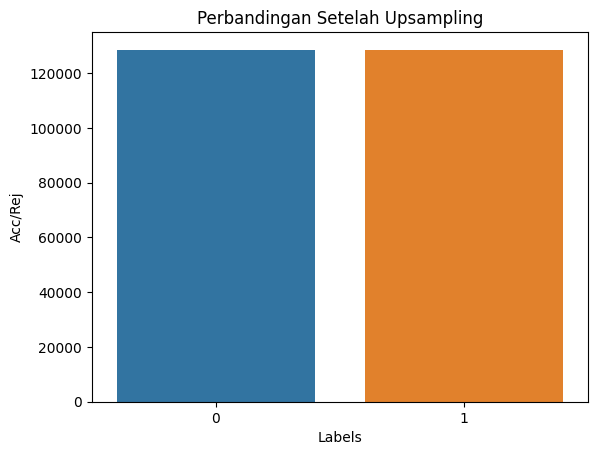

In [ ]:
oversample_plot = Y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','Acc/Rej']
print(oversample_plot)
sns.barplot(x='Labels',y='Acc/Rej',data=oversample_plot);
plt.title('Perbandingan Setelah Upsampling');

## Model

### Decision Tree

Training accuracy of Decision Tree is : 0.9963821957348811
Test accuracy of Decision Tree is : 0.7685213432520592
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     31987
           1       0.53      0.66      0.59     10626

    accuracy                           0.77     42613
   macro avg       0.70      0.73      0.71     42613
weighted avg       0.79      0.77      0.78     42613



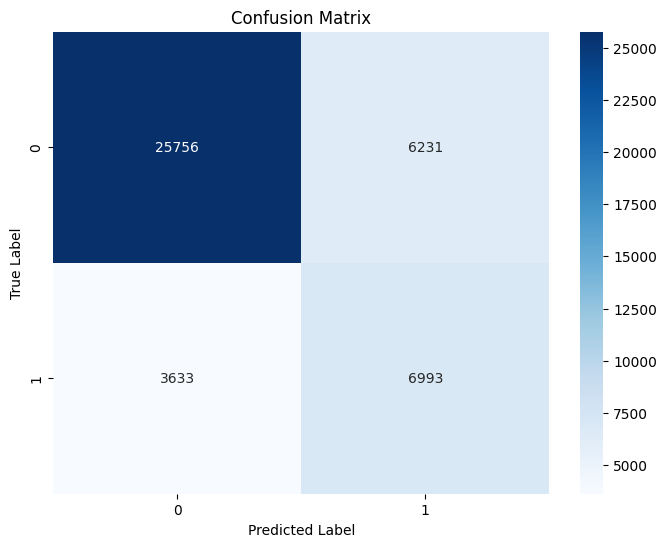

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_probs = dtc.predict_proba(X_test)[:, 1]

new_threshold = 0.6
Y_pred = (Y_probs > new_threshold).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Random Forest

Training accuracy of Random Forest is : 0.8310913320521898
Test accuracy of Random Forest is : 0.8244667120362331
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     31987
           1       0.68      0.56      0.61     10626

    accuracy                           0.82     42613
   macro avg       0.77      0.74      0.75     42613
weighted avg       0.82      0.82      0.82     42613



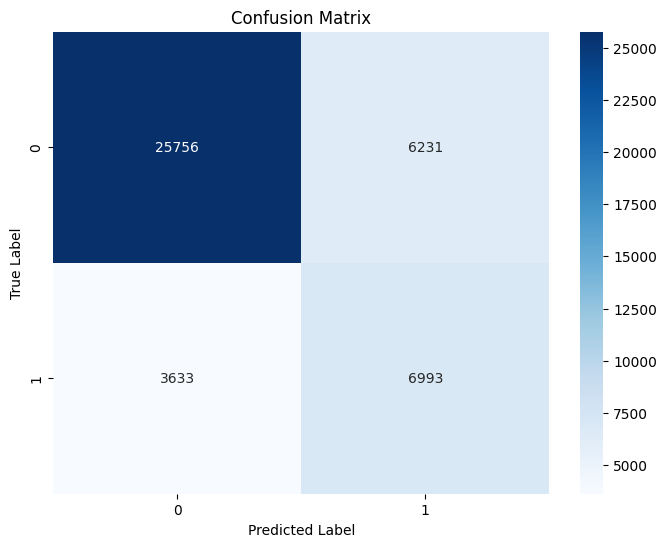

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= 'entropy',
                                  max_depth= 10,
                                  max_features= 'sqrt',
                                  min_samples_leaf= 1,
                                  min_samples_split= 3,
                                  n_estimators= 140)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rand_clf_train_acc = accuracy_score(Y_train, rf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, Y_pred)
print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(classification_report(Y_test, Y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Gradient Boost

Training Accuracy of Gradient Boosting Classifier is 0.8333359267414087
Test Accuracy of Gradient Boosting Classifier is 0.8189988970501959 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88     31987
           1       0.66      0.55      0.60     10626

    accuracy                           0.82     42613
   macro avg       0.76      0.73      0.74     42613
weighted avg       0.81      0.82      0.81     42613



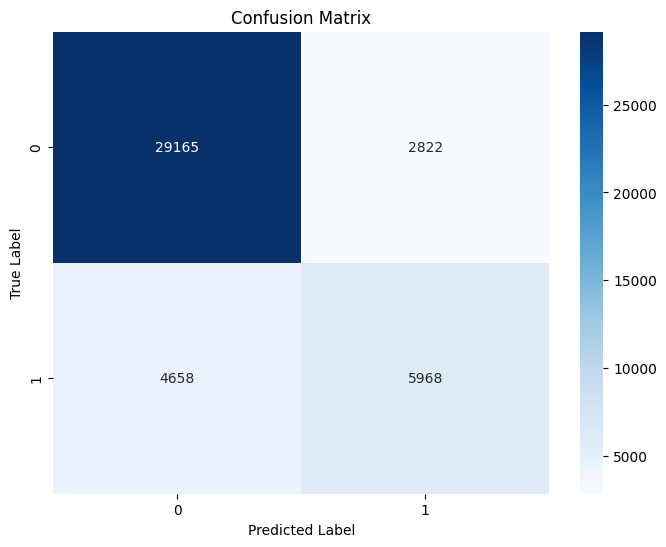

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

gb_acc = accuracy_score(Y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(Y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Classification Report :- \n {classification_report(Y_test, gb.predict(X_test))}")
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### XGBoost

Training accuracy of XgBoost is : 0.9139974014051085
Test accuracy of XgBoost is : 0.7689437495599935
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     31987
           1       0.53      0.71      0.60     10626

    accuracy                           0.77     42613
   macro avg       0.71      0.75      0.72     42613
weighted avg       0.80      0.77      0.78     42613



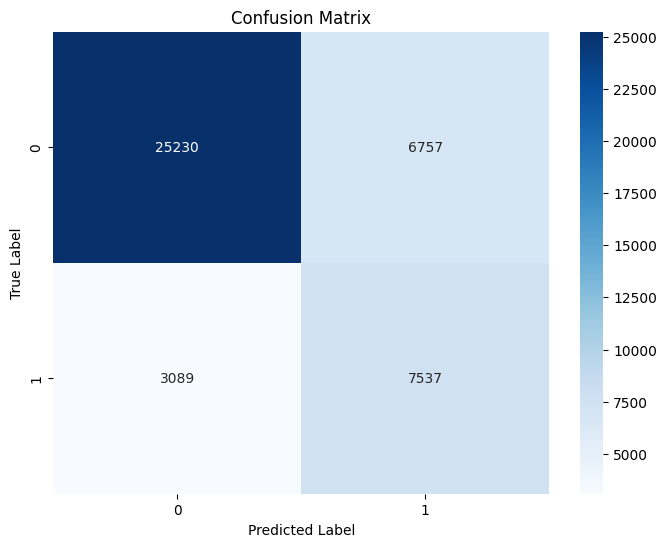

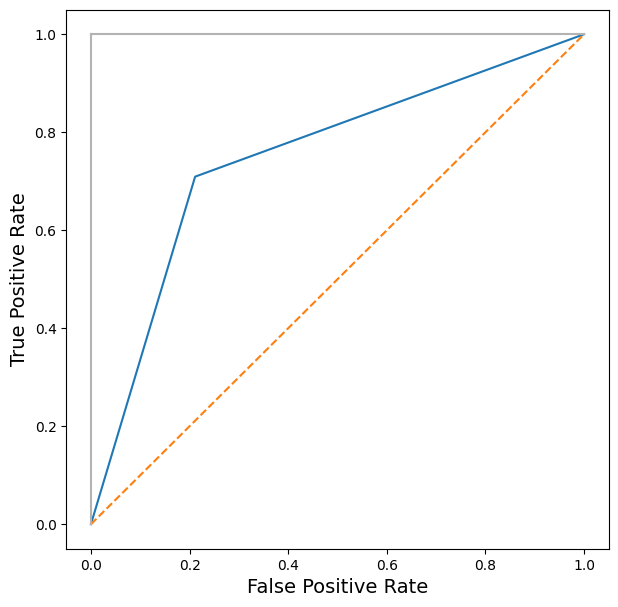

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=31987/10626, max_depth=11)
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

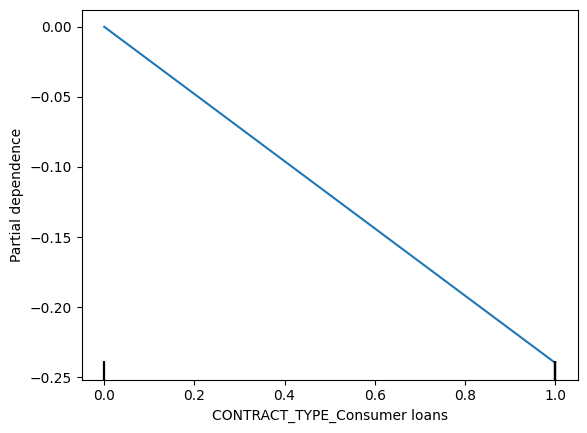

In [ ]:
features = [0]
pdp = PartialDependenceDisplay.from_estimator(xgb, X_test,features,feature_names=col_ar,centered=True)

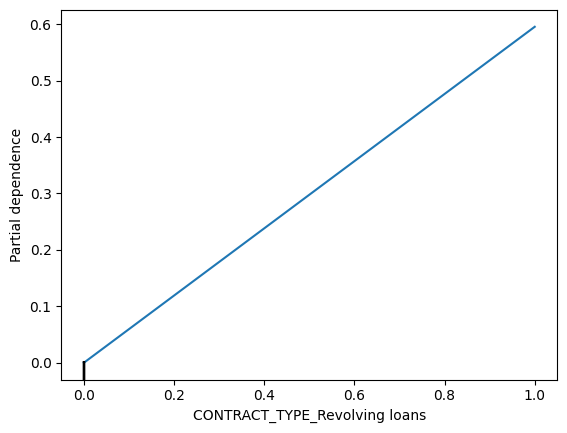

In [ ]:
features = [1]
pdp = PartialDependenceDisplay.from_estimator(xgb, X_test,features,feature_names=col_ar,centered=True)

### CatBoost

0:	learn: 0.5691228	total: 84.6ms	remaining: 42.2s
1:	learn: 0.4877171	total: 192ms	remaining: 47.9s
2:	learn: 0.4273965	total: 352ms	remaining: 58.3s
3:	learn: 0.3753317	total: 719ms	remaining: 1m 29s
4:	learn: 0.3321389	total: 1.1s	remaining: 1m 48s
5:	learn: 0.3090177	total: 1.24s	remaining: 1m 42s
6:	learn: 0.2917521	total: 1.64s	remaining: 1m 55s
7:	learn: 0.2738695	total: 2.05s	remaining: 2m 6s
8:	learn: 0.2572543	total: 2.43s	remaining: 2m 12s
9:	learn: 0.2481103	total: 2.8s	remaining: 2m 17s
10:	learn: 0.2405196	total: 2.89s	remaining: 2m 8s
11:	learn: 0.2350573	total: 2.96s	remaining: 2m
12:	learn: 0.2298997	total: 3.19s	remaining: 1m 59s
13:	learn: 0.2267518	total: 3.42s	remaining: 1m 58s
14:	learn: 0.2208146	total: 3.64s	remaining: 1m 57s
15:	learn: 0.2189888	total: 3.89s	remaining: 1m 57s
16:	learn: 0.2158603	total: 4s	remaining: 1m 53s
17:	learn: 0.2142771	total: 4.23s	remaining: 1m 53s
18:	learn: 0.2131238	total: 4.46s	remaining: 1m 52s
19:	learn: 0.2116940	total: 4.7s	re

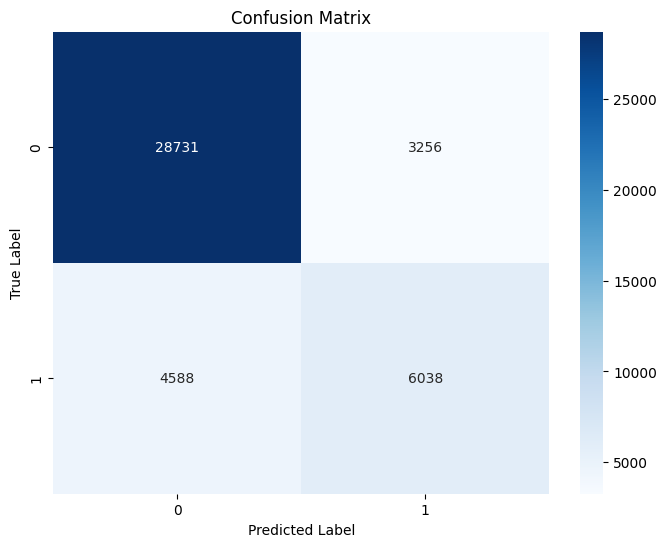

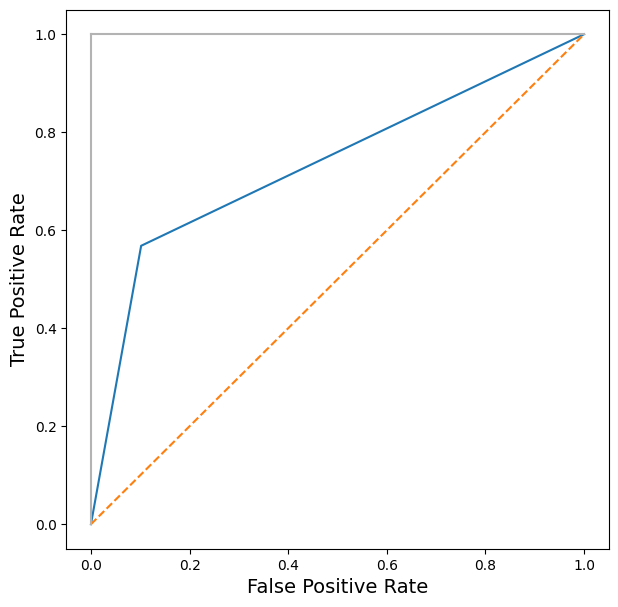

In [ ]:
import catboost
from catboost import CatBoostClassifier  # or CatBoostRegressor for regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cat_model = CatBoostClassifier(iterations=500,  # Adjust the number of iterations
                               depth=12,        # Adjust the depth of the trees
                               learning_rate=0.1,  # Adjust the learning rate
                               loss_function='Logloss',  # Use appropriate loss function
                               cat_features=[],  # Specify categorical features indices
                               random_seed=42,
                               class_weights=[1200,13541])  # Set a random seed for reproducibility

# Train the model
cat_model.fit(X_train, Y_train)

# Predict probabilities
Y_probs = cat_model.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class

# Set a new threshold (e.g., 0.3)
new_threshold = 0.9
Y_pred = (Y_probs > new_threshold).astype(int)

# Evaluate the model
print(classification_report(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
plt.subplots(1, figsize=(7,7))
plt.title('')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', size = 14)
plt.xlabel('False Positive Rate', size = 14)
plt.show()

### AdaBoost

Accuracy: 0.8122

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     31987
           1       0.64      0.55      0.59     10626

    accuracy                           0.81     42613
   macro avg       0.75      0.73      0.74     42613
weighted avg       0.80      0.81      0.81     42613



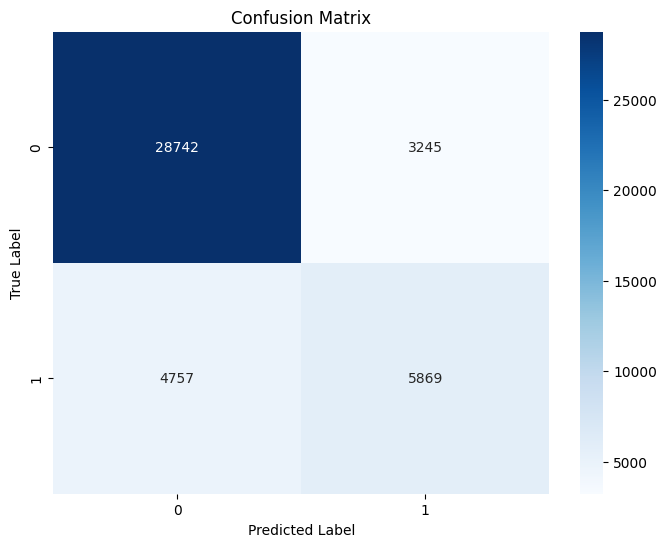

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create AdaBoost model with DecisionTree as base learner
base_model = DecisionTreeClassifier(max_depth=2)  # Shallow decision tree
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy_1 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy_1:.4f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Feature Importance

In [ ]:
feature_importance_cat = cat_model.feature_importances_

feature_importance_df_cat = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_cat})

feature_importance_df_cat = feature_importance_df_cat.sort_values(by='Importance', ascending=False)

print(feature_importance_df_cat)

                          Feature  Importance
12                           FLAG      49.193
1   CONTRACT_TYPE_Revolving loans      14.445
11                  DAYS_DECISION       9.353
14                      PERC_FULL       5.823
13                    PERC_ONTIME       3.678
0    CONTRACT_TYPE_Consumer loans       3.172
8                     APPLICATION       3.042
9                   PRODUCT_PRICE       2.999
10                     APPLY_HOUR       2.771
6              APPLY_DAYS_TUESDAY       0.997
2               APPLY_DAYS_MONDAY       0.985
3             APPLY_DAYS_SATURDAY       0.983
5             APPLY_DAYS_THURSDAY       0.944
7            APPLY_DAYS_WEDNESDAY       0.939
4               APPLY_DAYS_SUNDAY       0.676


In [ ]:
feature_importance_xgb = xgb.feature_importances_

feature_importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_xgb})

feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

print(feature_importance_df_xgb)

                          Feature  Importance
1   CONTRACT_TYPE_Revolving loans       0.342
0    CONTRACT_TYPE_Consumer loans       0.306
12                           FLAG       0.111
2               APPLY_DAYS_MONDAY       0.037
5             APPLY_DAYS_THURSDAY       0.031
3             APPLY_DAYS_SATURDAY       0.028
4               APPLY_DAYS_SUNDAY       0.028
7            APPLY_DAYS_WEDNESDAY       0.026
6              APPLY_DAYS_TUESDAY       0.025
11                  DAYS_DECISION       0.014
9                   PRODUCT_PRICE       0.014
14                      PERC_FULL       0.012
8                     APPLICATION       0.010
13                    PERC_ONTIME       0.008
10                     APPLY_HOUR       0.007


In [ ]:
feature_importance_ada = adaboost_model.feature_importances_

feature_importance_df_ada = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_ada})

feature_importance_df_ada = feature_importance_df_ada.sort_values(by='Importance', ascending=False)

print(feature_importance_df_ada)

                          Feature  Importance
11                  DAYS_DECISION       0.238
14                      PERC_FULL       0.137
9                   PRODUCT_PRICE       0.116
8                     APPLICATION       0.089
13                    PERC_ONTIME       0.081
0    CONTRACT_TYPE_Consumer loans       0.070
12                           FLAG       0.051
5             APPLY_DAYS_THURSDAY       0.040
10                     APPLY_HOUR       0.034
3             APPLY_DAYS_SATURDAY       0.030
7            APPLY_DAYS_WEDNESDAY       0.030
4               APPLY_DAYS_SUNDAY       0.025
2               APPLY_DAYS_MONDAY       0.025
6              APPLY_DAYS_TUESDAY       0.023
1   CONTRACT_TYPE_Revolving loans       0.010


# Model for Interest

## Extracting

### Categorical Data

In [ ]:
df_i_kategori = df_i.select_dtypes(include = ['object'])

In [ ]:
df_i_kategori = pd.get_dummies(df_i_kategori, drop_first = True)

### Numerical Data

In [ ]:
df_i_numerik = df_i.select_dtypes(include = ['int64','float64'])

### Training and Testing Preparation

In [ ]:
X = pd.concat([df_i_kategori, df_i_numerik], axis = 1)

In [ ]:
X

,CONTRACT_TYPE_Consumer loans,APPLY_DAYS_MONDAY,APPLY_DAYS_SATURDAY,APPLY_DAYS_SUNDAY,APPLY_DAYS_THURSDAY,APPLY_DAYS_TUESDAY,APPLY_DAYS_WEDNESDAY,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,...,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG,PERC_ONTIME,PERC_FULL
0,1,0,1,0,0,0,0,1730.430,17145.000,17145.000,...,15,-73,12.000,-42.000,-37.000,0.000,0.031,0.000,0.833,1.000
1,0,1,0,0,0,0,0,47041.335,450000.000,470790.000,...,7,-512,12.000,-482.000,-177.000,1.000,0.029,0.000,0.693,0.800
2,0,0,1,0,0,0,0,23703.930,315000.000,340573.500,...,8,-684,18.000,-654.000,-137.000,1.000,0.025,0.000,0.844,1.000
3,0,0,0,0,0,0,0,11368.620,270000.000,335754.000,...,7,-735,54.000,-705.000,-334.000,1.000,0.025,0.000,0.635,0.496
4,1,0,0,0,0,0,0,39111.075,214380.000,209497.500,...,12,-989,6.000,-958.000,-804.000,0.000,0.033,0.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160682,0,0,0,0,0,1,0,31170.645,720000.000,806485.500,...,10,-1071,42.000,-1041.000,-527.000,1.000,0.025,0.000,0.862,0.915
160683,0,0,0,0,0,0,1,101793.555,990000.000,1018750.500,...,4,-568,12.000,-538.000,-200.000,1.000,0.029,0.000,0.843,0.943
160684,1,0,0,0,0,1,0,14490.360,140754.240,153013.500,...,14,-1301,12.000,-1270.000,-967.000,0.000,0.020,1.000,1.000,1.000
160685,0,0,0,0,0,0,0,10751.985,90000.000,95940.000,...,10,-2199,12.000,-2169.000,-1833.000,1.000,0.049,0.000,0.791,0.987


In [ ]:
Y = X['Interest']
X = X.drop(columns = ['Interest'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
col = []
for i in range(len(X_train.columns)):
  col.append(X_train.columns[i])
col_i = np.array(col)
col_i

array(['CONTRACT_TYPE_Consumer loans', 'APPLY_DAYS_MONDAY',
       'APPLY_DAYS_SATURDAY', 'APPLY_DAYS_SUNDAY', 'APPLY_DAYS_THURSDAY',
       'APPLY_DAYS_TUESDAY', 'APPLY_DAYS_WEDNESDAY', 'LOAN_ANNUITY',
       'APPLICATION', 'APPROVED_CREDIT', 'AMT_DOWN_PAYMENT',
       'PRODUCT_PRICE', 'APPLY_HOUR', 'DAYS_DECISION', 'TERM_PAYMENT',
       'FIRST_DUE', 'TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'FLAG',
       'PERC_ONTIME', 'PERC_FULL'], dtype='<U28')

In [ ]:
Y_train

102443   0.031
112919   0.061
119612   0.020
113030   0.061
144758   0.031
          ... 
119997   0.041
103794   0.056
132066   0.033
147015   0.076
122077   0.021
Name: Interest, Length: 128414, dtype: float64

## Model

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

Y_pred = dtr.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

0.002849545922891285
3.9136517484959485e-05
0.8590318935395487


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

0.004945288910925944
0.09951110633668399
0.0386152956935902


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

0.0022779227626312155
1.849444790505437e-05
0.9333837686961054


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

0.006413944710791796
0.08923488636362825
0.038606793247241256


### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb = GradientBoostingRegressor(n_estimators = 200)
gb.fit(X_train, Y_train)

Y_pred = gb.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

0.007582848445118851
9.798812395146679e-05
0.6470508574412936


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

0.004822172883613684
0.06727171130354406
0.038595509453980145


### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(n_estimators = 200)
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

0.002224560886944945
1.091838560975598e-05
0.9606724296405819


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

0.00046178015
0.09517593
0.038660944


In [ ]:
feature_importance_xgb = xgb.feature_importances_

feature_importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_xgb})

feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

print(feature_importance_df_xgb)

                         Feature  Importance
0   CONTRACT_TYPE_Consumer loans       0.192
9                APPROVED_CREDIT       0.113
16                   TERMINATION       0.110
14                  TERM_PAYMENT       0.100
8                    APPLICATION       0.099
10              AMT_DOWN_PAYMENT       0.092
15                     FIRST_DUE       0.087
7                   LOAN_ANNUITY       0.067
13                 DAYS_DECISION       0.056
17     NFLAG_INSURED_ON_APPROVAL       0.029
18                          FLAG       0.027
20                     PERC_FULL       0.011
12                    APPLY_HOUR       0.004
1              APPLY_DAYS_MONDAY       0.003
19                   PERC_ONTIME       0.003
3              APPLY_DAYS_SUNDAY       0.003
6           APPLY_DAYS_WEDNESDAY       0.002
5             APPLY_DAYS_TUESDAY       0.002
4            APPLY_DAYS_THURSDAY       0.001
2            APPLY_DAYS_SATURDAY       0.001
11                 PRODUCT_PRICE       0.000


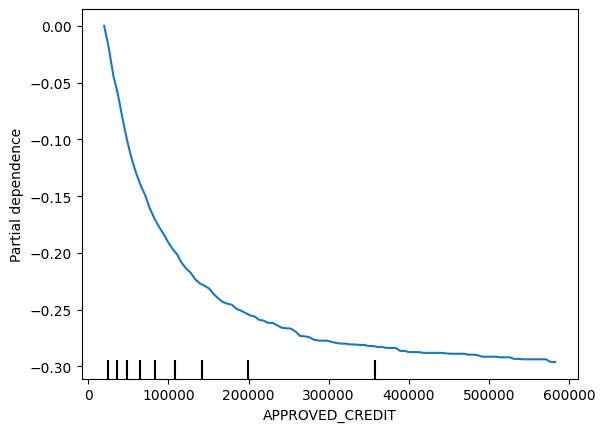

In [ ]:
features = [9]
pdp = PartialDependenceDisplay.from_estimator(xgb, X_test,features,feature_names=col_i,centered=True)

### CatBoost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

cat = CatBoostRegressor(iterations=300,
                               depth=12,
                               learning_rate=0.1,
                               cat_features=[],
                               random_seed=42)
cat.fit(X_train, Y_train)

Y_pred = cat.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

0:	learn: 0.0158870	total: 197ms	remaining: 58.9s
1:	learn: 0.0152499	total: 376ms	remaining: 56s
2:	learn: 0.0147337	total: 559ms	remaining: 55.3s
3:	learn: 0.0142817	total: 744ms	remaining: 55.1s
4:	learn: 0.0138806	total: 922ms	remaining: 54.4s
5:	learn: 0.0135259	total: 1.11s	remaining: 54.4s
6:	learn: 0.0132192	total: 1.29s	remaining: 53.9s
7:	learn: 0.0129518	total: 1.47s	remaining: 53.5s
8:	learn: 0.0127336	total: 1.66s	remaining: 53.5s
9:	learn: 0.0125382	total: 1.83s	remaining: 53.2s
10:	learn: 0.0123515	total: 2.02s	remaining: 53.1s
11:	learn: 0.0121892	total: 2.21s	remaining: 53s
12:	learn: 0.0120241	total: 2.38s	remaining: 52.6s
13:	learn: 0.0118837	total: 2.56s	remaining: 52.2s
14:	learn: 0.0117380	total: 2.73s	remaining: 51.9s
15:	learn: 0.0116179	total: 2.91s	remaining: 51.7s
16:	learn: 0.0115213	total: 3.09s	remaining: 51.4s
17:	learn: 0.0114081	total: 3.28s	remaining: 51.5s
18:	learn: 0.0112962	total: 3.46s	remaining: 51.3s
19:	learn: 0.0111881	total: 3.64s	remaining: 

In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

0.0035639822148195444
0.09235714809681778
0.03862944547110938


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_model = DecisionTreeRegressor(max_depth=2)
adaboost_model = AdaBoostRegressor(base_model, n_estimators=100, random_state=42)

adaboost_model.fit(X_train, Y_train)

Y_pred = adaboost_model.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

0.01223270237414768
0.00020512574932875918
0.26114559170296336


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

0.028381765770093402
0.05072665140313357
0.04007899004108405


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, Y_train)

Y_pred = knr.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

0.005767904473305244
8.60584525311552e-05
0.6900210371836016


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

0.006360406368804821
0.07458866854345256
0.03832029819958679


# Model for Credit Limit

## Extracting

### Categorical Data

In [ ]:
df_cl_kategori = df_cl.select_dtypes(include = ['object'])

In [ ]:
df_cl_kategori = pd.get_dummies(df_cl_kategori, drop_first = True)

### Numerical Data

In [ ]:
df_cl_numerik = df_i.select_dtypes(include = ['int64','float64'])

### Training and Testing Preparation

In [ ]:
X = pd.concat([df_cl_kategori, df_cl_numerik], axis = 1)

In [ ]:
Y = X['APPROVED_CREDIT']
X = X.drop(columns = ['APPROVED_CREDIT'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train

,CONTRACT_TYPE_Consumer loans,APPLY_DAYS_MONDAY,APPLY_DAYS_SATURDAY,APPLY_DAYS_SUNDAY,APPLY_DAYS_THURSDAY,APPLY_DAYS_TUESDAY,APPLY_DAYS_WEDNESDAY,LOAN_ANNUITY,APPLICATION,AMT_DOWN_PAYMENT,...,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Interest,FLAG,PERC_ONTIME,PERC_FULL
102443,1,0,0,0,0,1,0,10059.300,124586.325,24920.325,...,19,-223,12.000,-190.000,-92.000,0.000,0.031,0.000,1.000,1.000
112919,1,0,0,0,0,0,1,2069.730,17505.000,1800.000,...,9,-1372,12.000,-1327.000,-976.000,0.000,0.061,1.000,0.583,0.861
119612,1,0,1,0,0,0,0,10079.010,100800.000,10080.000,...,9,-2587,10.000,-2556.000,-2250.000,0.000,0.020,0.000,0.727,1.000
113030,1,1,0,0,0,0,0,3676.050,27688.500,2790.000,...,16,-1889,10.000,-1855.000,-1442.000,0.000,0.061,0.000,0.667,0.333
144758,1,0,0,0,0,1,0,7348.635,37746.000,0.000,...,19,-675,6.000,-644.000,-488.000,0.000,0.031,0.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119997,1,0,1,0,0,0,0,7104.915,58680.000,23472.000,...,11,-606,6.000,-575.000,-423.000,0.000,0.041,1.000,0.620,1.000
103794,1,0,0,0,0,0,1,8434.395,66429.000,8100.000,...,11,-2208,9.000,-2164.000,-1917.000,0.000,0.056,0.000,1.000,1.000
132066,0,0,0,0,0,0,1,10401.390,90000.000,0.000,...,8,-864,12.000,-834.000,-558.000,1.000,0.033,0.000,1.000,1.000
147015,1,1,0,0,0,0,0,3616.425,18841.500,945.000,...,12,-1232,10.000,-1201.000,-1106.000,0.000,0.076,0.000,0.833,1.000


In [ ]:
col = []
for i in range(len(X_train.columns)):
  col.append(X_train.columns[i])
col_cl = np.array(col)
col_cl

array(['CONTRACT_TYPE_Consumer loans', 'APPLY_DAYS_MONDAY',
       'APPLY_DAYS_SATURDAY', 'APPLY_DAYS_SUNDAY', 'APPLY_DAYS_THURSDAY',
       'APPLY_DAYS_TUESDAY', 'APPLY_DAYS_WEDNESDAY', 'LOAN_ANNUITY',
       'APPLICATION', 'AMT_DOWN_PAYMENT', 'PRODUCT_PRICE', 'APPLY_HOUR',
       'DAYS_DECISION', 'TERM_PAYMENT', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'Interest', 'FLAG', 'PERC_ONTIME'],
      dtype='<U28')

In [ ]:
col_cl[10]

'PRODUCT_PRICE'

## Model

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

Y_pred = dtr.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

3170.9438009282335
171572123.51766068
0.9967321562866716


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

6034.5
3524220.0
158517.93386353727


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

2998.462084425617
121672041.50713465
0.9976825768209018


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

6599.565
3204115.2
158556.99296205144


In [ ]:
feature_importance_rf = rf.feature_importances_

feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_rf})

feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print(feature_importance_df_rf)

                         Feature  Importance
10                 PRODUCT_PRICE       0.501
8                    APPLICATION       0.488
9               AMT_DOWN_PAYMENT       0.004
7                   LOAN_ANNUITY       0.002
13                  TERM_PAYMENT       0.002
16     NFLAG_INSURED_ON_APPROVAL       0.001
17                      Interest       0.001
15                   TERMINATION       0.000
14                     FIRST_DUE       0.000
12                 DAYS_DECISION       0.000
19                   PERC_ONTIME       0.000
11                    APPLY_HOUR       0.000
20                     PERC_FULL       0.000
0   CONTRACT_TYPE_Consumer loans       0.000
6           APPLY_DAYS_WEDNESDAY       0.000
18                          FLAG       0.000
2            APPLY_DAYS_SATURDAY       0.000
4            APPLY_DAYS_THURSDAY       0.000
1              APPLY_DAYS_MONDAY       0.000
5             APPLY_DAYS_TUESDAY       0.000
3              APPLY_DAYS_SUNDAY       0.000


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

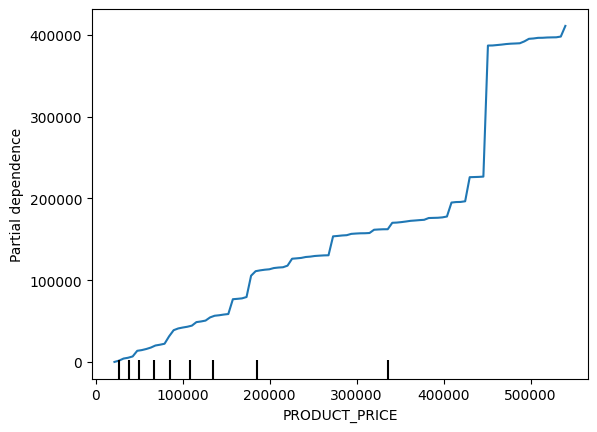

In [ ]:
features = [10]
pdp = PartialDependenceDisplay.from_estimator(rf, X_test,features,feature_names=col_cl,centered=True)

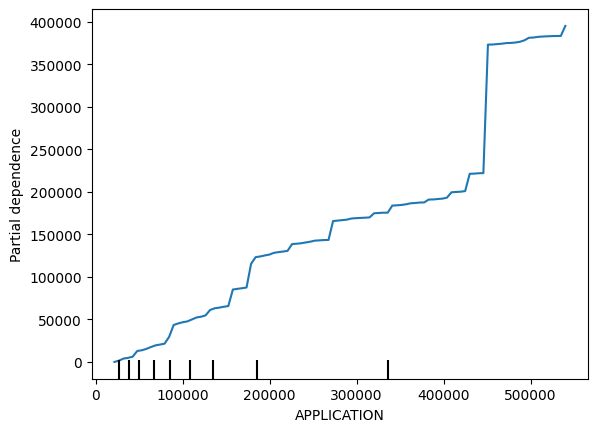

In [ ]:
features = [8]
pdp = PartialDependenceDisplay.from_estimator(rf, X_test,features,feature_names=col_cl,centered=True)

### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb = GradientBoostingRegressor(n_estimators = 200)
gb.fit(X_train, Y_train)

Y_pred = gb.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

6619.563211654528
167590512.75506642
0.9968079919261257


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

9745.144274042173
3521589.6063125725
158614.63023420365


### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(n_estimators = 200)
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

3237.072926762436
154736791.12491465
0.9970528099802523


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

6816.4316
3321333.0
158529.22


### CatBoost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

cat = CatBoostRegressor(iterations=300,
                               depth=12,
                               learning_rate=0.1,
                               cat_features=[],
                               random_seed=42)
cat.fit(X_train, Y_train)

Y_pred = cat.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

0:	learn: 207215.7097150	total: 193ms	remaining: 57.6s
1:	learn: 187746.5012236	total: 365ms	remaining: 54.4s
2:	learn: 170477.0868394	total: 545ms	remaining: 53.9s
3:	learn: 154614.1456851	total: 749ms	remaining: 55.4s
4:	learn: 139997.6224068	total: 921ms	remaining: 54.3s
5:	learn: 127121.2751860	total: 1.1s	remaining: 53.8s
6:	learn: 115558.6309656	total: 1.27s	remaining: 53.3s
7:	learn: 104950.8154930	total: 1.44s	remaining: 52.7s
8:	learn: 95510.5114776	total: 1.61s	remaining: 52s
9:	learn: 87166.5801098	total: 1.8s	remaining: 52.1s
10:	learn: 79452.8524734	total: 1.97s	remaining: 51.7s
11:	learn: 72623.6548831	total: 2.14s	remaining: 51.4s
12:	learn: 66452.3374155	total: 2.32s	remaining: 51.2s
13:	learn: 60929.8205006	total: 2.49s	remaining: 50.9s
14:	learn: 56066.1806342	total: 2.66s	remaining: 50.6s
15:	learn: 51601.8161578	total: 2.85s	remaining: 50.6s
16:	learn: 47577.1006253	total: 3.02s	remaining: 50.3s
17:	learn: 44160.2510612	total: 3.2s	remaining: 50.2s
18:	learn: 40893.

In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

5455.617745421594
3180606.1275042994
158458.55394898975


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_model = DecisionTreeRegressor(max_depth=5)
adaboost_model = AdaBoostRegressor(base_model, n_estimators=200, random_state=42)

adaboost_model.fit(X_train, Y_train)

Y_pred = adaboost_model.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

40752.3055344724
2364543365.933129
0.9549637900677856


In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

358768.2131122801
3069520.160757372
395622.50446332764


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, Y_train)

Y_pred = knr.predict(X_test)

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

6200.330603694243
258642998.3900164
0.9950737632725153


In [ ]:
mean_absolute_error(Y_test,Y_pred)

6200.330603694243

In [ ]:
print(np.min(Y_pred))
print(np.max(Y_pred))
print(np.mean(Y_pred))

6724.8
3389500.8
158738.1644432781
